## Talk to Professor About float number Generalization**

# Intro to Random Forests

### Your practice

### Books

The more familiarity you have with numeric programming in Python, the better. If you're looking to improve in this area, we strongly suggest Wes McKinney's [Python for Data Analysis, 2nd ed](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662/ref=asap_bc?ie=UTF8).

For machine learning with Python, we recommend:

- [Introduction to Machine Learning with Python](https://www.amazon.com/Introduction-Machine-Learning-Andreas-Mueller/dp/1449369413): From one of the scikit-learn authors, which is the main library we'll be using
- [Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow, 2nd Edition](https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1787125939/ref=dp_ob_title_bk): New version of a very successful book. A lot of the new material however covers deep learning in Tensorflow, which isn't relevant to this course
- [Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291/ref=pd_lpo_sbs_14_t_0?_encoding=UTF8&psc=1&refRID=MBV2QMFH3EZ6B3YBY40K)


## Imports

In [6]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from fastai.imports import *




In [8]:
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [4]:
import torch

In [5]:
torch.cuda.device(0)


In [6]:
torch.cuda.is_available()

False

In [7]:
PATH = "../../../house-prices-advanced-regression-techniques/"

In [8]:
!ls {PATH}

data_description.txt  test.csv
sample_submission.csv train.csv


# Introduction to *Blue Book for Bulldozers*

## About...

### ...this dataset

We will be looking at the Blue Book for Bulldozers Kaggle Competition: "The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuration.  The data is sourced from auction result postings and includes information on usage and equipment configurations."

This is a very common type of dataset and prediciton problem, and similar to what you may see in your project or workplace.

### ...Kaggle Competitions

Kaggle is an awesome resource for aspiring data scientists or anyone looking to improve their machine learning skills.  There is nothing like being able to get hands-on practice and receiving real-time feedback to help you improve your skills.

Kaggle provides:

1. Interesting data sets
2. Feedback on how you're doing
3. A leader board to see what's good, what's possible, and what's state-of-art.
4. Blog posts by winning contestants share useful tips and techniques.

## The data

### Look at the data

Kaggle provides info about some of the fields of our dataset; on the [Kaggle Data info](https://www.kaggle.com/c/bluebook-for-bulldozers/data) page they say the following:

For this competition, you are predicting the sale price of bulldozers sold at auctions. The data for this competition is split into three parts:

- **Train.csv** is the training set, which contains data through the end of 2011.
- **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012. You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in train.csv are:

- SalesID: the unique identifier of the sale
- MachineID: the unique identifier of a machine.  A machine can be sold multiple times
- saleprice: what the machine sold for at auction (only provided in train.csv)
- saledate: the date of the sale

*Question*

What stands out to you from the above description?  What needs to be true of our training and validation sets?

In [9]:
!head '{PATH}train.csv'

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PCo

In [10]:
name = 'Hassan'

In [11]:
f'Hello {name}'

'Hello Hassan'

In [12]:
age =23

In [13]:
#pandas f'{PATH}Train.csv'lets use csv file

In [14]:
f'{PATH}train.csv'

'../../../house-prices-advanced-regression-techniques/train.csv'

In [15]:
#rows

In [16]:
!wc -l '{PATH}train.csv'

    1461 ../../../house-prices-advanced-regression-techniques/train.csv


In [17]:
!cat '{PATH}train.csv'


Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PCo

1327,30,RH,70,4270,Pave,NA,Reg,Bnk,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,1Story,3,6,1931,2006,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,Rec,544,Unf,0,0,544,GasA,Ex,Y,SBrkr,774,0,0,774,0,0,1,0,3,1,Gd,6,Typ,0,NA,NA,NA,NA,0,0,NA,NA,Y,0,0,286,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,79000
1328,20,RL,60,6600,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,9,1982,2008,Gable,CompShg,VinylSd,VinylSd,None,0,Gd,Gd,CBlock,TA,TA,No,ALQ,641,Unf,0,175,816,GasA,Ex,Y,SBrkr,816,0,0,816,0,1,1,0,3,1,Gd,5,Typ,1,Ex,Attchd,1982,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,10,2008,WD,Normal,130500
1329,50,RM,60,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493,Unf,0,1017,1510,GasW,Ex,Y,SBrkr,1584,1208,0,2792,0,0,2,0,5,1,TA,8,Mod,2,TA,Detchd,1920,Unf,2,520,Fa,TA,Y,0,547,0,0,480,0,NA,MnPrv,Shed,1150,6,2008,WD,Normal,256000
1330,60,RL,63,9084,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilb

In [18]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False)

In any sort of data science work, it's **important to look at your data**, to make sure you understand the format, how it's stored, what type of values it holds, etc. Even if you've read descriptions about your data, the actual data may not be what you expect.

In [19]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [20]:
#transpose column as rows 

In [21]:
display_all(df_raw.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


The variable we want to predict is called #Dependent Variable 
in this case our dependent variable is SalePrice

In [22]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's important to note what metric is being used for a project. Generally, selecting the metric(s) is an important part of the project setup. However, in this case Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.

In [23]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [24]:
df_raw.SalePrice

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

### Initial processing

In [25]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


In [26]:
#classifier for categorical and regressor for continuius

In [27]:
m = RandomForestRegressor(n_jobs=-1) #because we are using continious variable to predict
#other wise classifier used for category 

# The following code is supposed to fail due to string values in the input data
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

# m.fit(idependent, dependent )

ValueError: could not convert string to float: 'RL'

This dataset contains a mix of **continuous** and **categorical** variables.

The following method extracts particular date fields from a complete datetime for the purpose of constructing categoricals.  You should always consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities.

The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

In [28]:
df_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
df_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


In [30]:
#See USAGE BAND Need to Categories to Integers

#### Remember Test Set Maapping should be same as Training Set mapping
Train_cats Creates categorical variable for df columns having type string

##### Two make the same training and testing mapping same ??apply_cats Used

In [31]:
train_cats(df_raw)

In [32]:
#Let say for training it assign 3 for high category
#For testing there can be another

In [33]:
df_raw.Street.cat.codes#press tabs

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Length: 1460, dtype: int8

## specify the order 

We can  to use for categorical variables 
if we wish:



**example**

df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'],ordered=True,inplace = True)

In [34]:
df_raw.Street.cat.categories

Index(['Grvl', 'Pave'], dtype='object')

In [35]:
#df_raw.protein_seq.cat.codes

In [36]:
#-1 for missing

We're still not quite done - for instance we have lots of 
### missing values,
which we can't pass directly to a random forest.

In [37]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

## Saving into ram


In [38]:
os.makedirs('tmp', exist_ok=True)

df_raw.to_feather('tmp/house-raw')

### Pre-processing

In the future we can simply read it from this fast format.

In [39]:
df_raw = pd.read_feather('tmp/house-raw')

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [40]:
#if missing value is numeric replace it with new boolean column_na
#(1 means missed 0 means not missed  ) plus original column with median value
#categories not need to handle missing assigned  codes = codes +1 
#so missing value by default was zero now it becomes 1 

We now have something we can pass to a random forest!

In [41]:
??proc_df

if
missing value is numeric

replace it
with new boolean column_na

(1 means missed 0 means not missed )
plus original column with median value

#categories not need to handle missing assigned codes = codes +1

so
missing value by default was zero now it becomes 1

In [42]:
??fix_missing

## proc_df issue 
An interesting little issue that was brought up during the week is in proc_df function. proc_df function does the following:
Finds numeric columns which have missing values and create an additional boolean column as well as replacing the missing with medians.
Turn the categorical objects into integer codes.

### Problem #1: 
Your test set may have missing values in some columns that were not in your training set or vice versa. If that happens, you are going to get an error when you try to do the random forest since the “missing” boolean column appeared in your training set but not in the test set.

### Problem #2: 
Median of the numeric value in the test set may be different from the training set. So it may process it into something which has different semantics.
### Solution: 
There is now an additional return variable nas from proc_df which is a dictionary whose keys are the names of the columns that had missing values, and the values of the dictionary are the medians. Optionally, you can pass nas to proc_df as an argument to make sure that it adds those specific columns and uses those specific medians:

#### df, y, nas = proc_df(df_raw, 'SalePrice', nas)

In [43]:
df, y, nas = proc_df(df_raw, 'SalePrice')


In [44]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,1,60,4,65.0,8450,2,0,4,4,1,...,0,0,0,2,2008,9,5,False,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,0,0,0,5,2007,9,5,False,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,0,0,0,9,2008,9,5,False,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,0,0,0,2,2006,9,1,False,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,0,0,0,12,2008,9,5,False,False,False


In [45]:
#Split data to CPU's (seperate the job)
m = RandomForestRegressor(n_jobs=-1)
m.fit(df,y)
m.score(df,y)

0.9825360862625035

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). https://en.wikipedia.org/wiki/Coefficient_of_determination

Wow, an r^2 of 0.98 - that's great, right? Well, perhaps not...

Possibly **the most important idea** in machine learning is that of having separate training & validation data sets. As motivation, suppose you don't divide up your data, but instead use all of it.  And suppose you have lots of parameters:

<img src="images/overfitting2.png" alt="" style="width: 70%"/>
<center>
[Underfitting and Overfitting](https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted)
</center>

The error for the pictured data points is lowest for the model on the far right (the blue curve passes through the red points almost perfectly), yet it's not the best choice.  Why is that?  If you were to gather some new data points, they most likely would not be on that curve in the graph on the right, but would be closer to the curve in the middle graph.

This illustrates how using all our data can lead to **overfitting**. A validation set helps diagnose this problem.

In [46]:
!wc -l '{PATH}test.csv'

    1460 ../../../house-prices-advanced-regression-techniques/test.csv


In [47]:
!wc -l '{PATH}train.csv'

    1461 ../../../house-prices-advanced-regression-techniques/train.csv


In [48]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 292  # 20% of data
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1168, 83), (1168,), (292, 83))

# Random Forests

## Base model

Let's try our model again, this time with separate training and validation sets.

In [49]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
# rms (train , validation), r2 score(train,valid) 
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [50]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
# rms (train , validation), r2 score(train,valid) 
print_score(m)


CPU times: user 1.74 s, sys: 38.8 ms, total: 1.78 s
Wall time: 352 ms
[0.053544646267263046, 0.1506611126154398, 0.9821981016037655, 0.8516048781631134]


## Comments on Score

As you see, **R²** is **.982** on the **training set**,


and only 


**.848 on the validation set** 

which makes us think that we are overfitting quite badly. 

But not too badly as **RMSE of 0.15** 

An r^2 in the high-80's isn't bad at all (and the RMSLE puts us around rank 100 of 470 on the Kaggle leaderboard), but we can see from the validation set score that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.

## Execution Time


If you put **%time**, it will tell you how long things took. 

The rule of thumb is that if something takes more than **10 seconds** to run, it is **too long to do interactive analysis** with it. 


So what we do is we try to make sure that things can run in a reasonable time. And then when we are finished at the end of the day, we can say ok, this feature engineering, these hyper parameters, etc are all working well, and we will now re-run it the big slow precise way.

One way to speed things up is to pass in the subset parameter to proc_df which will randomly sample the data:

## Speeding things up
there was a bug in proc_df that was shuffling the dataframe when subset gets passed in hence causing the validation set to be not the latest (12000 for bulldozers) records. 

In [51]:

"""
randomly sample 300000 make sure it does not overlap with
validation set
_ means throw something away

why boot strap

procdf return dict with for each missing column it will tell 
what the median is pass na means it will update 
"""

#total 401126 was Bulldozer Prediction

#here we have 1461


# i will use all


#subset was 300000

# i dont have large dataset here
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=1168, na_dict=nas)
#second argument was 292
X_train, _ = split_vals(df_trn, 1168)
y_train, _ = split_vals(y_trn, 1168)

##  Why is nas both input and out put of this function?

1. proc_df returns a dictionary telling you which columns were missing and for each of those columns what the median was.

2. When you call proc_df on a larger dataset, you do not pass in nas but you want to keep that return value.

3. Later on, when you want to create a subset (by passing in subset), you want to use the same missing columns and medians, so you pass nas in.

4. If it turns out that the subset was from a whole different dataset and had different missing columns, it would update the dictionary with additional key value.

5. It keeps track of any missing columns you came across in anything you passed to proc_df .


**Once we have done proc_df, this is what it looks like. SalePrice is the log of the sale price.**




**Be careful to make sure that validation set does not change**

**Also make sure that training set does not overlap with the dates**


As you see above, when calling split_vals, we do not put the result to a validation set. *_* indicates that we are throwing away the return value. We want to keep validation set the same all the time.
After resampling the training set into the first 20,000 out of a 30,000 subsets, 

it runs in 621 milliseconds.

In [52]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1.75 s, sys: 37.2 ms, total: 1.79 s
Wall time: 354 ms
[0.05534427214008016, 0.08443110298427035, 0.9814397339010015, 0.9533961055829362]


## Root Mean Square Log Error

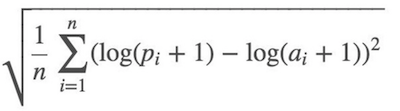

In [53]:
from IPython.display import Image
Image("images/formula.png")



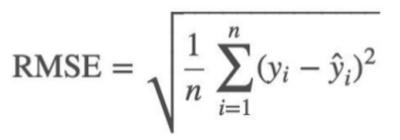

In [54]:
from IPython.display import Image
Image("images/formula2.png")



### Review 

## add_datepart ,  train_cats , Proc_df

Then we made everything in the dataset to numbers by doing the following:
#### add_datepart — 
extract date-time features Elapsed represents how many days are elapsed since January 1st, 1970.
#### train_cats — 
converts string to pandas category data type. We then replace categorical columns with category codes by running proc_df

#### proc_df __
also replaces missing values of the continuous columns with the median and adds the column called [column name]_na and sets it to true to indicate it was missing.




## What is R²



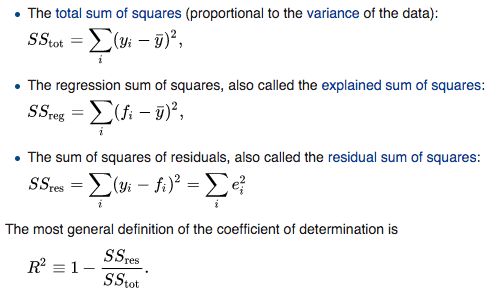

In [55]:

Image("images/formula_3.png")

**yi** : actual/target data

**ȳ**: the average (mean)

**SStot**: how much the data vary
The simplest non-stupid model we came up with last week was create a column of the mean and submit that to Kaggle. In that case, RMSE = SStot (i.e. RMSE of a naïve model)

**fi**: predictions
**SSres** is RMSE of the actual model
If we were exactly as effective as just predicting the mean, 

**SSres/SStot** = 1 and R² = 0

If we were perfect (i.e. yi = fi for all cases), SSres/SStot = 0 and R² = 1

## What is the possible range of R² 

Correct answer: Anything equal to or less than 1. If you predicted infinity for every row, 


**R² = 1 −∞**

So when your R² is **negative**, it means your model is worse than predicting the mean.

R² is not necessarily what you are actually trying to optimize, but it is a number you can use for every model and you can start to get a feel of what .8 looks like or what .9 looks like. Something you may find interesting is to create synthetic 2D datasets with different amounts of random noise, and see what they look like on a scatterplot and their R² to get a feel of how close they are to the actual value.


R² is the ratio between how good your model is (RMSE)vs. how good is the naïve mean model (RMSE).

## Why & When not choose random set of rows as a validation set

Because if we did that, we would not be **replicating the test set**. If you actually look at the dates in the test set, they are a set of dates that are more recent than any date in the training set. So if we used a **validation set that was a random sample**, that is much easier because we are predicting the value of a piece of industrial equipment on this day **when we already have some observations from that day**. 

**In general**, anytime you are building a model that has a **time** element, you want your **test set** to be a **separate time period** and therefore you really need your validation set to be of separate time period as well.



## Single tree
Overfitting becomes low you can compare


forest made of trees ..scikit we call it estimators
we just create 1 tree with max deapth =3
dont randomize everything so bootstrap =false


**n_estimators=1** — create a forest with just one tree
**max_depth=3** — to make it a small tree
**bootstrap=False** — random forest randomizes bunch of things, we want to turn that off by this parameter



In [56]:



m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)






[0.21504463912439364, 0.21591986363683321, 0.7197819678360657, 0.6952087615435625]


### Concept About Random Forest From Scratch

"""
I want to build random forest from scratch what I would do find 
the variable that we could split into such that two groups are
different to each other as possible

Task 1
which variable
task 2
which cut point

Solution
All possible split


it means for each variable 
    for each possible value of variable
        see if it is better
        
        what is better?
        problem spliting such a way 
        one group have 1 row 
        other have rest
        
        evaluate weighted average of two groups
        17805*0.415+ 2195 *0.112
        
        
        
        
"""

We now have a single number that represents how good a split is which is the weighted average of the mean squared errors of the two groups that creates . We also have a way to find the best split which is to try try every variable and to try every possible value of that variable and see which variable and which value gives us a split with the best score

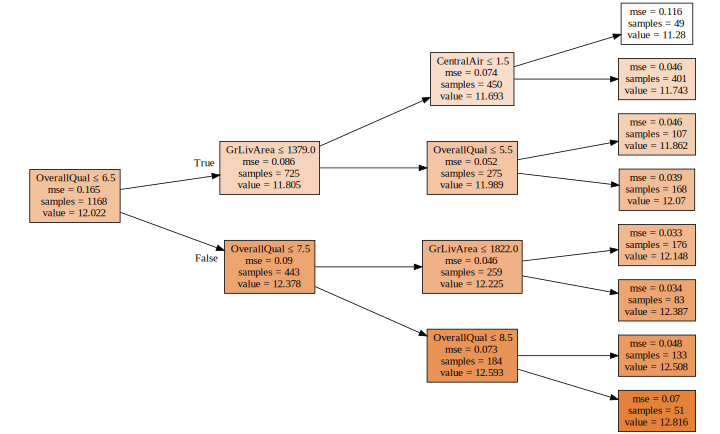

In [57]:
draw_tree(m.estimators_[0], df_trn, precision=3)


**A tree** consists of a sequence of binary decisions.


The first line indicates the binary split criteria
samples at the root is 1168 since that is what we specified when splitting the data.


**Darker color** indicates higher value


**value** is average of the log of price, and if we built a model where we just used the average all the time, then the mean squared error mse would be 0.495


**The best single binary split** we can make turns out to be Coupler_system ≤ 0.5 which will improve mse to 0.109 in false path; 0.414 in true path.


In [58]:
m1 = RandomForestRegressor(n_estimators=1000, max_depth=3, bootstrap=False, n_jobs=-1)
m1.fit(X_train, y_train)
print_score(m1)


[0.21504463912439364, 0.21591986363684104, 0.7197819678360657, 0.6952087615435405]


## Let’s make our decision tree better

Right now, our decision tree has R² of 0.48. Let’s make it better by removing max_depth=3. By doing so, the training R² becomes 1 (as expected since each leaf node contains exactly one element) and validation R² is  0.9508 — which is better than the shallow tree but not as good as we would like.




Let's see what happens if we create a bigger tree.

In [59]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

#last two are training r^2 and validation r^2 values respectivetly

[9.002630353187415e-17, 0.11965258425760517, 1.0, 0.9064031032043071]


The training set result looks great! But the validation set is worse than our original model. This is why we need to use *bagging* of multiple trees to get more generalizable results.

## Bagging

### Intro to bagging

To learn about bagging in random forests, let's start with our basic model again.




Michael Jordan developed a technique called the **Bag of Little** Bootstraps in which he shows how to use bagging for absolutely any kind of model to make it more robust and also to give you 

**confidence intervals**.



**Random forest** — a way of bagging trees.
**So **

#### what is bagging?

Bagging is an interesting idea which is what if we created five different models each of which was only somewhat predictive but the models gave predictions that were not correlated with each other.

That would mean that the five models would have profound different insights into the relationships in the data. If you took the average of those five models, you are effectively bringing in the insights from each of them. So this idea of averaging models is a technique for Ensembling.


What if we created a whole a lot of trees — big, deep, massively overfit trees but each one, let’s say, we only pick a random **1/10 of the data**. 

Let’s say we do that a hundred times **(different random sample every time)**. 

They are overfitting terribly but since they are **all using different random samples**, they all overfit in different ways on different things. In other words, they **all have errors** but the errors are **random**. The average of a bunch of **random errors is zero**. If we take the average of these trees each of which have been trained on a different random subset, the error will **average out to zero** and what is left is the **true relationship** — and that’s the random forest.

In [9]:
?RandomForestRegressor

In [61]:
m = RandomForestRegressor(n_jobs=-1)

#See the bag of little bootstraps in notes
#by default you can see estimator =100 
#which means it will create 10 trees


#Extra regressor what differennce is it randomly tries a few 
#splits of few variables much faster more randomness
#co relation between trees should be minimize in order to 
#generalize

m.fit(X_train, y_train)
print_score(m)

[0.056122907864352374, 0.08627247414672451, 0.9809138133065154, 0.9513411556581031]


We'll grab the predictions for each individual tree, and look at one example.

In [62]:
#each tree is stored in underscore estimoators

preds = np.stack([t.predict(X_valid) for t in m.estimators_])
#above code gives me prediction for each model
#preds[:,0], np.mean(preds[:,0]), y_valid[0]
preds[:,0]

array([12.45293, 12.25486, 12.36734, 12.36734, 12.36734, 12.36734, 12.36734, 12.36734, 12.36734, 11.89478,
       12.36734, 12.36734, 12.36734, 12.36734, 12.02575, 11.82408, 12.36734, 12.36734, 12.36734, 11.82408,
       12.36734, 12.36734, 12.24047, 12.36734, 12.51356, 12.38839, 12.36734, 12.34126, 12.36734, 12.36734,
       12.36734, 12.51356, 12.36734, 12.36734, 12.11669, 12.36734, 12.36734, 12.36734, 11.83138, 12.36734,
       12.36734, 12.36734, 12.36734, 12.42922, 12.36734, 12.19552, 12.36734, 12.36734, 12.53177, 12.46651,
       12.36734, 12.36734, 11.94194, 12.01673, 12.36734, 12.46651, 12.36734, 12.36734, 12.25961, 12.25961,
       11.92437, 12.36734, 12.36734, 12.36734, 12.36734, 12.36734, 12.36734, 11.82408, 12.36734, 12.36734,
       12.36734, 12.36734, 12.36734, 12.28535, 12.36734, 12.36734, 12.28765, 12.27839, 12.36734, 12.36734,
       12.36734, 12.20919, 12.36734, 12.24047, 12.36734, 11.82408, 12.36734, 12.17045, 12.03172, 12.36734,
       12.07254, 12.36734, 12.36734, 

In [63]:
preds.shape
#I have 12000 predictions for each of my 10 tree 


(100, 292)

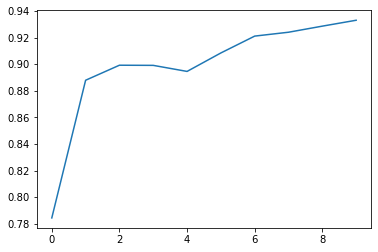

In [64]:
# for each of 10 trees take mean of all of predictions upto ith tree

#predict r^2 more bagging the more generalize
#Be ware the last point on upside should match 
#Bagging 1st window
#1:07:24 Lesson 2
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [65]:
#Doubling and compare r^2 value not help that much
#1:08
m = RandomForestRegressor(n_estimators=2*10, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.060887414585134955, 0.08856278683031298, 0.9775356475284056, 0.9487233277797341]


In [66]:
m = RandomForestRegressor(n_estimators=4*10, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.05833823084968779, 0.08852065999761397, 0.9793773083916728, 0.9487720979260708]


In [67]:
m = RandomForestRegressor(n_estimators=8*10, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.057206541087303504, 0.0893420486141892, 0.9801696574112281, 0.9478169934825309]



Adding more trees slows it down, but with less trees you can still get the same insights. So when Jeremy builds most of his models, he starts with 20 or 30 trees and at the end of the project or at the end of the day’s work, he will use 1000 trees and run it over night.



##  Out-of-bag (OOB) score



Sometimes your dataset will be **small** and you will not want to **pull out** a **validation set** because doing so means you now do not have enough data to build a good model. However, random forests have a very clever trick called out-of-bag **(OOB) error** which can handle this (and more!)


What we could do is to recognize that in our **first tree**, some of the rows did not get **used** for **training**. What we could do is to pass those **unused rows** through the first tree and treat it as a validation set. 

For the **second tree**, we could pass through the rows that were not used for the second tree, and so on. 

Effectively, we would have a **different validation** set for **each tree**. To calculate our prediction, we would average all the trees where that row is not used for training. If you have hundreds of trees, it is very likely that all of the rows are going to appear many times in these out-of-bag samples. You can then calculate RMSE, R², etc on these out-of-bag predictions.



Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called *out-of-bag (OOB) error* which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was *not* included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our `print_score` function below.

## slight Change change in dataset




In [68]:

"""
randomly sample 300000 make sure it does not overlap with
validation set
_ means throw something away

why boot strap

procdf return dict with for each missing column it will tell 
what the median is pass na means it will update 
"""

#total 401126 was Bulldozer Prediction

#here we have 1461


# i will use all


#subset was 30000

# i dont have large dataset here
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=280, na_dict=nas)
#second argument was 292
X_train, _ = split_vals(df_trn, 200)
y_train, _ = split_vals(y_trn, 200)

In [69]:
#Some of rows which are not used during random sampling

#pass them as validation feature
#and so on
#different validation set for each tree

#oob_score=TRUE  it will create this thing for u
#one extra number at the end in print score will do this for you

m = RandomForestRegressor(n_estimators=4*10, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)
#automated way to set hyperparameters
# 1:15 See Speeding up this  I just subset 30000 row and make 
#all trees with random 30000 rows
#Why dont i do all different 30000 each time 
#rather than bootstraping
#all the rows solution is below

[0.05580160271475155, 0.184684827131741, 0.9790846676486317, 0.7770129107434789, 0.8456333606473179]


This shows that our validation set time difference is making an impact, as is model over-fitting.

## Check Again (increase Trees With OBB Score)

In [70]:
#Doubling and compare r^2 value not help that much
#1:08
m = RandomForestRegressor(n_estimators=2*10, n_jobs=-1,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.059886099424192984, 0.1814280619349904, 0.9759107389228244, 0.7848079579740855, 0.840194718763175]


In [71]:
m = RandomForestRegressor(n_estimators=8*10, n_jobs=-1,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.053643476265440006, 0.17650549528101298, 0.9806711839939632, 0.7963268658780508, 0.8539199033136646]


In [72]:
m = RandomForestRegressor(n_estimators=10*10, n_jobs=-1,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0551142781550347, 0.1754645556911132, 0.9795967349208913, 0.7987221030417613, 0.8578103590481844]


## Grid Search (Tune Parameters)

OOB score will come in handy when setting hyper parameters . There will be quite a few hyper parameters that we are going to set and we would like to find some automated say to set them. One way to do that is to do grid search. 

Scikit-learn has a function called grid search and you pass in a list of all the hyper parameters you want to tune and all of the values of these hyper parameters you want to try. It will run your model on every possible combination of all these hyper parameters and tell you which one is the best. OOB score is a great choice for getting it to tell you which one is the best.

## Reducing over-fitting

### Subsampling


Earlier, we took 30,000 rows and created all the models which used a different subset of that 30,000 rows. Why not take a **totally different subset of 30,000 each time?** In other words, let’s leave the entire 389,125 records as is, and if we want to make things faster, pick a different subset of **30,000 each time**. So rather than bootstrapping the entire set of rows, just randomly sample a subset of the data.

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: *subsampling*. Let's return to using our full dataset, so that we can demonstrate the impact of this technique.

In [73]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

len(X_train)


1168

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a *different* random subset per tree. That way, given enough trees, the model can still see *all* the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [74]:
#not bootstrap means not replacemet =TRUE

set_rf_samples(200)



In [75]:
#reset_rf_samples() see this

?RandomForestRegressor

In [76]:
#if you use this approACH oob=false

m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1.79 s, sys: 36.8 ms, total: 1.82 s
Wall time: 399 ms
[0.05357386117387329, 0.14683761346279223, 0.9821786702425356, 0.8590412893017044, 0.8666171296430277]


Since each additional tree allows the model to see more data, this approach can make additional trees more useful.

In [77]:
#Enogh tree will see everything

#increase estimator to 40 larger 0.86 to 0.876

set_rf_samples(200)


m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)


#Advantage lets say you have 120000 million rows 
#random forest will be forever you can use this solution instead
#So no dataset is too big

[0.05656789528859177, 0.14695659905592343, 0.9801310804643196, 0.8588127531551712, 0.8622606796393348]


## What samples is this OOB score calculated on

Scikit-learn does not support this out of box, so set_rf_samples is a custom function. So OOB score needs to be turned off when using set_rf_samples as they are not compatible. reset_rf_samples() will turn it back to the way it was.

## The biggest tip


Most people run all of their models on all of the data all of the time using their best possible parameters which is just pointless. If you are trying to find out which feature is important and how they are related to each other, having that 4th decimal place of accuracy is not going to change any of your insights at all. Do most of your models on a large enough sample size that your accuracy is reasonable (within a reasonable distance of the best accuracy you can get) and taking a small number of seconds to train so that you can interactively do your analysis.

### Tree building parameters

We revert to using a full bootstrap sample in order to show the impact of other over-fitting avoidance methods.

In [78]:
reset_rf_samples()

Let's get a baseline for this full set to compare to.

In [79]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [80]:
#validation set score 2nd last answer ob is kast one

m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.05546047162116928, 0.1514245613363953, 0.9809014090537905, 0.8500971352849199, 0.8613719046555373]


## Comments
Here OOB is higher than validation set. This is because our validation set is a different time period whereas OOB samples are random. It is much harder to predict a different time period.

## Tree Depth Calculation

In [81]:
t=m.estimators_[0].tree_

In [82]:
dectree_max_depth(t)

23

In [83]:

#min sample means stop training the tree further when
# when your leaf node has 5 or less sample in possible 
#1,3,5,10,25

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09415765452951227, 0.15559189188726397, 0.9449515020050611, 0.8417326950161932, 0.8592285143954838]


In [84]:
t=m.estimators_[0].tree_

In [85]:
dectree_max_depth(t)

14

## Experimenting With (min_samples_leaf) 

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with `min_samples_leaf`) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better
- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [86]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07566657880902865, 0.14828462582069582, 0.9644497706622633, 0.8562494432821562, 0.8643298760293079]


In [87]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09322127038881677, 0.15727016709971778, 0.9460409562684343, 0.8383000146704354, 0.8578114663153531]


In [88]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=7, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.10574597370158395, 0.1563302744281504, 0.9305676457197636, 0.8402269725108422, 0.8553103302888267]


In [89]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=9, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11482576260630936, 0.163675095757281, 0.9181322438715279, 0.8248611509289575, 0.8502366832455551]


In [90]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=11, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1204035403539417, 0.16108079747301327, 0.9099854479491067, 0.8303691547554051, 0.8508970577972628]


In [91]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=13, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.12736454090062493, 0.16352940159791543, 0.8992763908092825, 0.8251728092239083, 0.842615528041904]


In [92]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.131961019538537, 0.16834485307926395, 0.8918751457947364, 0.8147249368562597, 0.8426921134864007]


In [93]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=17, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.13612389120651588, 0.16980216138841756, 0.8849456824251518, 0.8115033170802654, 0.8343217161939064]


In [94]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=21, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1414736141916601, 0.17304267498411702, 0.8757246178431584, 0.8042401046752251, 0.8311641626652657]


In [95]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=21, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.14234363514774898, 0.17443530353464726, 0.8741914040748588, 0.8010765170735685, 0.8297013248454963]


In [96]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=25, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1478862003142324, 0.17298896931225108, 0.8642032076614262, 0.8043615982342832, 0.8219557773465646]


## increase the amount of variation

### Max Feature


We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

- None
- 0.5
- 'sqrt'

- 1, 3, 5, 10, 25, 100

**max_features=0.5** : The idea is that the less correlated your trees are with each other, the better. Imagine you had one column that was so much better than all of the other columns of being predictive that every single tree you built always started with that column. But there might be some interaction of variables where that interaction is more important than the individual column. So if every tree always splits on the same thing the first time, you will not get much variation in those trees.


**In addition** to taking a subset of rows, at every single split point, take a different subset of columns.


**For row sampling**, each new tree is based on a random set of rows, for column sampling, every individual binary split, we choose from a different subset of columns.

**0.5 means randomly choose a half of them. There are special values you can use such as sqrt or log2**


**Good values** to use are **1, 0.5, log2, or sqrt**

The RMSLE of ____ would get us to the top 20 of this competition — with brainless random forest with some brainless minor hyper parameter tuning. This is why Random Forest is such an important not just first step but often only step of machine learning. It is hard to screw up.



In [97]:
#every split we choose different subset of column rather than
#looking every possible column 0.5 randomly choose half of then
# pass sqrt lg  goog value is 0.5 log2 or sqrt ...see second 
# row root mean square error of log price drop from 0.234 to 0.2286

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=25, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.14710610033261243, 0.16842169573475474, 0.8656320856922842, 0.814555757022091, 0.8289932928010976]


In [98]:

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=25, max_features='sqrt', n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.16067926820534778, 0.17733570418342437, 0.8396924781326434, 0.7944063713740515, 0.8109505597749606]


In [99]:

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=25, max_features='log2', n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1744225948152658, 0.18590975787526862, 0.8110966340599075, 0.7740451568179681, 0.7805728636673261]


We can't compare our results directly with the Kaggle competition, since it used a different validation set (and we can no longer to submit to this competition) - but we can at least see that we're getting similar results to the winners based on the dataset we have.

The sklearn docs [show an example](http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html) of different `max_features` methods with increasing numbers of trees - as you see, using a subset of features on each split requires using more trees, but results in better models:
![sklearn max_features chart](http://scikit-learn.org/stable/_images/sphx_glr_plot_ensemble_oob_001.png)

In [100]:
df_raw.HouseStyle

0       2Story
1       1Story
2       2Story
3       2Story
4       2Story
         ...  
1455    2Story
1456    1Story
1457    2Story
1458    1Story
1459    1Story
Name: HouseStyle, Length: 1460, dtype: category
Categories (8, object): ['1.5Fin' < '1.5Unf' < '1Story' < '2.5Fin' < '2.5Unf' < '2Story' < 'SFoyer' < 'SLvl']

In [101]:
df_raw.HouseStyle.cat.categories

Index(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer',
       'SLvl'],
      dtype='object')

In [102]:
df_raw.HouseStyle.cat.codes

0       5
1       2
2       5
3       5
4       5
       ..
1455    5
1456    2
1457    5
1458    2
1459    2
Length: 1460, dtype: int8

# Part _2

## Understanding the data better by using machine learning
This idea is contrary to the common refrain that things like random forests are black boxes that hide meaning from us. The truth is quite the opposite. Random forests allow us to understand our data deeper and more quickly than traditional approaches.

## How to look at larger datasets
Dataset with over 100 million rows like Grocery Dataset

## When to use random forests

Cannot think of anything offhand that it is definitely not going to be at least somewhat useful. So it is always worth trying. The real question might be in what situation should we try other things as well, and the short answer to that is for unstructured data (image, sound, etc), you almost certainly want to try deep learning. For collaborative filtering model (groceries competition is of that kind), neither random forest nor deep learning approach is exactly what you want and you need to do some tweaks.

## Review (Read CSV)

Reading CSV took a minute or two, and we saved it to a feather format file. Feather format is almost the same format that it lives in RAM, so it is ridiculously fast to read and write. The first thing we do is in the notebook is to read in the feather format file.


## Corporación Favorita Grocery Sales Forecasting 

Let’s walk through the same process when you are working with a really large dataset. It is almost the same but there are a few cases where we cannot use the defaults because defaults run a little bit too slowly.


It is important to be able to explain the problem you are working on. The key things to understand in a machine learning problem are:
What are the independent variables?

What is the dependent variable (the thing you are trying to predict)?
In this competition


**Dependent variable** — how many units of each kind of product were sold in each store on each day during the two week period.

**Independent variables** — how many units of each product at each store on each day were sold in the last few years. For each store, where it is located and what class of store it is (metadata). For each type of product, what category of product it is, etc. For each date, we have metadata such as what the oil price was.



## relational dataset

Relational dataset is one where we have a number of different pieces of information that we can join together. Specifically this kind of relational dataset is what we refer to as “star schema” where there is some central transactions table. In this competition, the central transactions table is train.csv which contains the number units that were sold by date , store_nbr , and item_nbr. From this, we can join various bits of metadata (hence the name “star” schema — there is also one called “snowflake” schema).


## Reading Data (Bits Optimization)

In [103]:
"""
types = {'id': 'int64',
         'item_nbr': 'int32',
         'store_nbr': 'int8',
         'unit_sales': 'float32',
         'onpromotion': 'object'}
%%time
df_all = pd.read_csv(f'{PATH}train.csv', parse_dates=['date'], 
                     dtype=types, infer_datetime_format=True)
"""

"\ntypes = {'id': 'int64',\n         'item_nbr': 'int32',\n         'store_nbr': 'int8',\n         'unit_sales': 'float32',\n         'onpromotion': 'object'}\n%%time\ndf_all = pd.read_csv(f'{PATH}train.csv', parse_dates=['date'], \n                     dtype=types, infer_datetime_format=True)\n"

If you set **low_memory=False**, it will run out of memory regardless of how much memory you have.


In order to **limit the amount of space** that it takes up when you read in, we create a dictionary for each column name to the data type of that column. **It is up to you to figure out the data types** by 

running or less or head on the dataset.


With these tweaks, we can read in 125,497,040 rows in less than 2 minutes.

Python itself is not fast, but almost everything we want to do in Python in data science has been written for us in C or more often in Cython which is a python like language that compiles to C. 

In Pandas, a lot of it is written in assembly language which is heavily optimized. Behind the scene, a lot of that is going back to calling Fortran based libraries for linear algebra.


## Are there any performance consideration to specifying int64 vs. int ?

The key performance here was to use the smallest number of bits that I could to fully represent the column. 

If we used **int8** for **item_nbr** , the maximum item_nbr is **bigger than 255** and it will not fit. On the other hand, if we used **int64 for the store_nbr** , it is using more bits than necessary.


Given that the whole purpose here was to avoid running out of RAM, we do not want to use up 8 times more memory than necessary. 


When you are working with large datasets, very often you will find that the slow piece is reading and writing to RAM, not the CPU operations. 

Also as a rule of thumb, **smaller data types** often will run faster particularly if you can use Single Instruction Multiple Data (SIMD)
vectorized code, 

it can pack more numbers into a single vector to run at once.



## Do we not have to shuffle the data anymore (?


Although here I have read in the whole thing, when I start I never start by reading in the whole thing.

## Get Random Sample by Unix

By using a UNIX command **shuf**, you can get a random sample of data at the command prompt and then you can just read that. This is a good way, for example, to find out what data types to use — read in a random sample and let Pandas figure it out for you. In general, I do as much work as possible on a sample until I feel confident that I understand the sample before I move on.

To pick a random line from a file using **shuf** use the **-n** option. This limits the output to the number specified. You can also specify the output file:


**shuf -n 5 -o sample_training.csv train.csv**

### 'onpromotion': ‘object' 

— object is a general purpose Python datatype which is slow and memory heavy. The **reason** for this is it is a boolean which also has **missing values**, so we need to **deal with** this before we can turn it into a **boolean** as you see below:


In [104]:
"""
df_all.onpromotion.fillna(False, inplace=True)
df_all.onpromotion = df_all.onpromotion.map({'False': False, 
                                             'True': True})
df_all.onpromotion = df_all.onpromotion.astype(bool)
%time df_all.to_feather('tmp/raw_groceries')
"""


"\ndf_all.onpromotion.fillna(False, inplace=True)\ndf_all.onpromotion = df_all.onpromotion.map({'False': False, \n                                             'True': True})\ndf_all.onpromotion = df_all.onpromotion.astype(bool)\n%time df_all.to_feather('tmp/raw_groceries')\n"



**fillna(False):** we would not do this without checking first, but some exploratory data analysis shows that it is probably an appropriate thing to do (i.e. missing means false).

**map({‘False’: False, ‘True’: True}) :** object usually reads in as string, so replace string ‘True’ and ‘False’ with actual booleans.


**astype(bool) :** Then finally convert it to boolean type.

The feather file with over 125 million records takes up something under 2.5GB of memory.

Now it is in a nice fast format, we can save it to feather format in under 5 seconds.

Pandas is generally fast, so you can summarize every column of all 125 million records in 20 seconds:

In [105]:
"""
%time df_all.describe(include='all')

"""

"\n%time df_all.describe(include='all')\n\n"

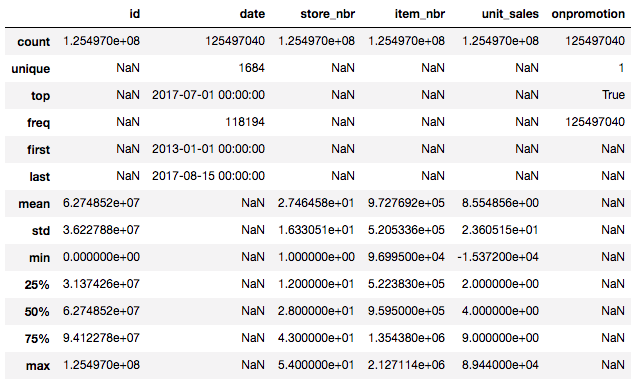

In [106]:
Image("images/description.png")


## Dates Importance


First thing to look at is the dates. **Dates** are important because any models you put in in practice, you are going to be putting it in at some date that is later than the date that you trained it by definition. So if **anything in the world changes, you need to know how your predictive accuracy changes** as well. So for Kaggle or for your own project, you should always make sure that your dates do not overlap 

## Grocery Dataset Observations

In this case, training set goes from 2013 to August 2017


In [107]:
"""

df_test = pd.read_csv(f'{PATH}test.csv', parse_dates = ['date'],
                      dtype=types, infer_datetime_format=True)
df_test.onpromotion.fillna(False, inplace=True)
df_test.onpromotion = df_test.onpromotion.map({'False': False, 
                                               'True': True})
df_test.onpromotion = df_test.onpromotion.astype(bool)
df_test.describe(include='all')

"""

"\n\ndf_test = pd.read_csv(f'{PATH}test.csv', parse_dates = ['date'],\n                      dtype=types, infer_datetime_format=True)\ndf_test.onpromotion.fillna(False, inplace=True)\ndf_test.onpromotion = df_test.onpromotion.map({'False': False, \n                                               'True': True})\ndf_test.onpromotion = df_test.onpromotion.astype(bool)\ndf_test.describe(include='all')\n\n"

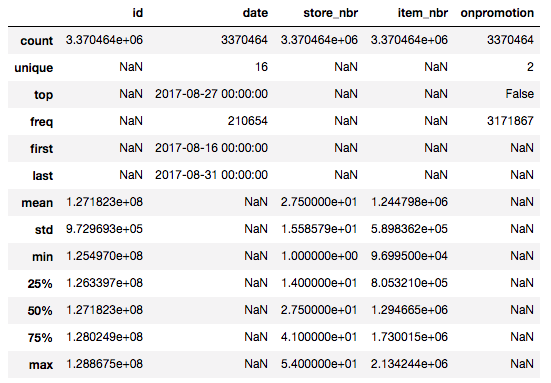

In [108]:
Image("images/des2.png")


**In** our test set, they go from one day later until the end of the month.

This is a key thing — you cannot really do any useful machine learning until you understand this basic piece. You have four years of data and you are trying to predict the next two weeks. This is a fundamental thing you need to understand before you can go and do a good job at this.


If you **want** to use a smaller dataset, we should use the **most recent — not random set.**


## Wouldn’t four years ago around the same time frame be important ((e.g. around Christmas time))


It is not that there is no useful information from four years ago so we do not want to entirely throw it away. But as a first step, if you were to submit the mean, you would not submit the mean of 2012 sales, but probably want to submit the mean of last month’s sale.And later on, we might want to weight more recent dates more highly since they are probably more relevant. But we should do bunch of exploratory data analysis to check that.

In [109]:
"""
df_all.tail()

"""

'\ndf_all.tail()\n\n'

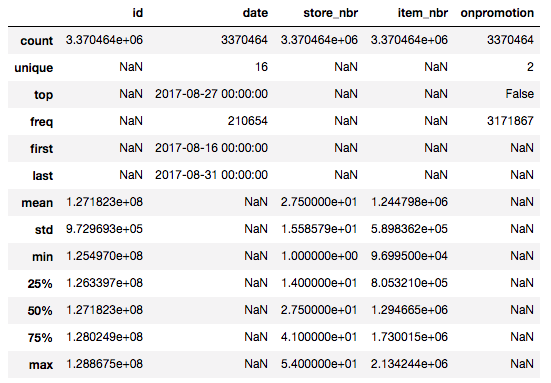

In [110]:
Image("images/des2.png")


In [111]:
"""

df_all.unit_sales = np.log1p(np.clip(df_all.unit_sales, 0, None))

"""

'\n\ndf_all.unit_sales = np.log1p(np.clip(df_all.unit_sales, 0, None))\n\n'

We have to take a log of the sales because we are trying to predict something that varies according to the ratios and they told us, in this competition, that root mean squared log error is something they care about.


**np.clip(df_all.unit_sales, 0, None):** there are some negative sales that represent returns and the organizer told us to consider them to be zero for the purpose of this competition. clilp truncates to specified min and max.



**np.log1p :** log of the value plus 1. The competition detail tells you that they are going to use root mean squared log plus 1 error because log(0) does not make sense.

In [112]:
"""
%time add_datepart(df_all, 'date')

"""

"\n%time add_datepart(df_all, 'date')\n\n"



We can add date part as usual. It takes a couple of minutes, so we should run through all this on sample first to make sure it works. Once you know everything is reasonable, then go back and run on a whole set.




In [113]:
"""
n_valid = len(df_test)
n_trn = len(df_all) - n_valid
train, valid = split_vals(df_all, n_trn)
train.shape, valid.shape
((122126576, 18), (3370464, 18))
"""

'\nn_valid = len(df_test)\nn_trn = len(df_all) - n_valid\ntrain, valid = split_vals(df_all, n_trn)\ntrain.shape, valid.shape\n((122126576, 18), (3370464, 18))\n'

These lines of code are identical to what we saw for bulldozers competition. We do not need to run train_cats or apply_cats since all of the data types are already numeric 

## Apply_Cats Function
(remember apply_cats applies the same categorical codes to validation set as the training set)

In [114]:
"""
%%time
trn, y, nas  = proc_df(train, 'unit_sales')
val, y_val, nas = proc_df(valid, 'unit_sales', nas)

"""

"\n%%time\ntrn, y, nas  = proc_df(train, 'unit_sales')\nval, y_val, nas = proc_df(valid, 'unit_sales', nas)\n\n"

In [115]:
"""
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)
"""

"\ndef rmse(x,y): return math.sqrt(((x-y)**2).mean())\ndef print_score(m):\n    res = [rmse(m.predict(X_train), y_train),\n           rmse(m.predict(X_valid), y_valid),\n           m.score(X_train, y_train), m.score(X_valid, y_valid)]\n    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)\n    print(res)\n"

In [116]:
"""
set_rf_samples(1_000_000)
%time x = np.array(trn, dtype=np.float32)
CPU times: user 1min 17s, sys: 18.9 s, total: 1min 36s
Wall time: 1min 37s
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=100, 
                          n_jobs=8)
%time m.fit(x, y)

"""

'\nset_rf_samples(1_000_000)\n%time x = np.array(trn, dtype=np.float32)\nCPU times: user 1min 17s, sys: 18.9 s, total: 1min 36s\nWall time: 1min 37s\nm = RandomForestRegressor(n_estimators=20, min_samples_leaf=100, \n                          n_jobs=8)\n%time m.fit(x, y)\n\n'

## Recap set_rf_samples
We have learned about set_rf_samples last week. We probably do not want to create a tree from 125 million records (not sure how long that will take). You can start with 10k or 100k and figure out how much you can run. There is no relationship between the size of the dataset and how long it takes to build the random forests — the relationship is between the number of estimators multiplied by the sample size.

## n_job Function

What is n_job? In the past, it has always been -1 . The number of jobs is the number of cores to use. I was running this on a computer that has about 60 cores and if you try to use all of them, it spent so much time spinning out jobs and it was slower. If you have lots of cores on your computer, sometimes you want less (-1 means use every single core).

## converts data frame into an array of floats & why?

Another change was **x = np.array(trn, dtype=np.float32)**. This converts data frame into an array of floats and we fit it on that. Inside the random forest code, they do this anyway. Given that we want to run a few different random forests with a few different hyper parameters, doing this once myself saves 1 min 37 sec.


## Profiler : %prun
If you run a line of code that takes quite a long time, you can put %prun in front.


In [117]:
"""
%prun m.fit(x, y)
"""


'\n%prun m.fit(x, y)\n'

## why Profiler Run

This will run a profiler and tells you which lines of code took the most time. Here it was the code in scikit-learn that was the line of code that converts data frame to numpy array.


Looking to see which things is taking up the time is called “profiling” and in software engineering is one of the most important tool. But data scientists tend to under appreciate it.
For fun, try running %prun from time to time on code that takes 10–20 seconds and see if you can learn to interpret and use profiler outputs.

## Problem set_rf_samples
Something else Jeremy noticed in the profiler is we can’t use OOB score when we do set_rf_samples because if we do, it will use the other 124 million rows to calculate the OOB score. Besides, we want to use the validation set that is the most recent dates rather than random.

In [118]:
"""

print_score(m)
"""

'\n\nprint_score(m)\n'

So this got us 0.76 validation root mean squared log error.


In [119]:
"""m = RandomForestRegressor(n_estimators=20, min_samples_leaf=10, 
                          n_jobs=8)
%time m.fit(x, y)
"""

'm = RandomForestRegressor(n_estimators=20, min_samples_leaf=10, \n                          n_jobs=8)\n%time m.fit(x, y)\n'

In [120]:
#This gets us down to 0.71 even though it took a little longer.


In [121]:
"""m = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, 
                          n_jobs=8)
%time m.fit(x, y)"""

'm = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, \n                          n_jobs=8)\n%time m.fit(x, y)'

## Reasoning

This brought this error down to 0.70. min_samples_leaf=1 did not really help. So we have a “reasonable” random forest here. But this does not give a good result on the leader board. 


### Why? Let’s go back and see the data:

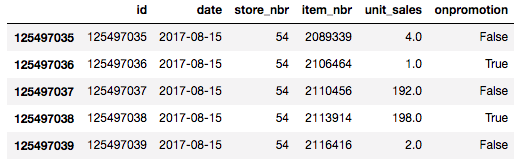

In [122]:
Image("images/des3.png")


## Reasoning


These are the columns we had to predict with (plus what were added by add_datepart). Most of the insight around how much of something you expect to sell tomorrow is likely to be wrapped up in the details about where the store is, what kind of things they tend to sell at the store, for a given item, what category of item it is. Random forest has no ability to do anything other than create binary splits on things like day of week, store number, item number. It does not know type of items or location of stores. Since its ability to understand what is going on is limited, 

we probably need to use the entire 4 years of data to even get some useful insights. But as soon as we start using the whole 4 years of data, a lot of the data we are using is really old. There is a Kaggle kernel that points out that what you could do is :

1. Take the last two weeks.

2. Take the average sales by store number, by item number, by on promotion, then take a mean across date.

3. Just submit that, and you come about 30th 🎉

We will talk about this in the next class, but if you can figure out how you start with that model and make it a little bit better, you will be above 30th place.


## Improvement Arguements

### Question:
Could you try to capture seasonality and trend effects by creating new columns like average sales in the month of August?

### Answer
 great idea. The thing to figure out is how to do it because there are details to get right and are difficult- not intellectually difficult but they are difficult in a way that makes you headbutt your desk at 2am
 
 
 **Coding you do for machine learning** is incredibly frustrating and incredibly difficult. If you get a detail wrong, much of the time it is not going to give you an exception it will just silently be slightly less good than it otherwise would have been. If you are on Kaggle, you will know that you are not doing as well as other people. But otherwise you have nothing to compare against. You will not know if your company’s model is half as good as it could be because you made a little mistake. This is why practicing on Kaggle now is great.
 
 
 Unfortunately there is not a set of specific things you should always do, you just have to think what you know about the results of this thing I am about to do. Here is a really simple example. If you created that basic entry where you take the mean by date, by store number, by on promotion, you submitted it, and got a reasonable score. Then you think you have something that is a little bit better and you do predictions for that. 
 
 ### HOW To Check Performace AvgModel vs Predictive
 
 How about you create a scatter plot showing the prediction of your average model on one axis versus the predictions of your new model on the other axis. You should see that they just about form a line. If they do not, then that is a very strong suggestion that you screwed something up.


### Argument 2 To Improve Performance

That information is actually provided. In general, one way of tackling this kind of problem is to create lots of new columns containing things like average number of sales on holidays, average percent change in sale between January and February, etc


### Similar Competetions
https://www.kaggle.com/c/rossmann-store-sales

There has been a pervious competition for a grocery chain in Germany that was almost identical. The person who won was a domain expert and specialist in doing logistics predictions. He created lots of columns based on his experience of what kinds of things tend to be useful for making predictions. So that is an approach that can work. The third place winner did almost no feature engineering, however, and they also had one big oversight which may have cost them the first place win. We will be learning a lot more about how to win this competition and ones like it as we go.


## Importance of good validation set why?

If you do not have a good validation set, it is hard, if not impossible, to create a good model. If **you are trying to predict next month’s sales and you build models**. 

If **you have no way of knowing** whether the **models you have built are good at predicting sales a month ahead of time**, then you have **no way** of knowing whether it is actually going to be any good when you put your model in production. You need a validation set that you know is reliable at telling you whether or not your model is likely to work well when you put it in production or use it on the test set.

## calibrate your validation set

Normally you should not use your test set for anything other than using it right at the end of the competition or right at the end of the project to find out how you did. But there is one thing you can use the test set for in addition


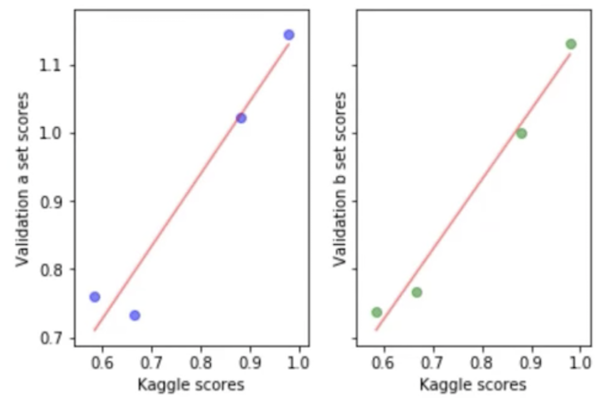

In [123]:
Image("images/des5.png")


## Build Four Models And Trying on 4 different Validation Sets


What Terrance did here was that he built four different models and submitted each of the four models to Kaggle to find out its score. X-axis is the score Kaggle told us on the leaderboard, and y-axis he plotted the score on a particular validation set he was trying out to see whether the validation set was going to be any good. If your validation set is good, then the relationship between the leaderboards score (i.e. the test set score) should lie in a straight line. Ideally, it will lie on the y = x line, but honestly that does not matter too much as long as relatively speaking it tells you which models are better than which other models, then you know which model is the best. In this case, Terrance has managed to come up with a validation set which looks like it is going to predict the Kaggle leaderboard score well. That is really cool because he can go away and try a hundred different types of models, feature engineering, weighting, tweaks, hyper parameters, whatever else, see how they go on the validation set, and not have to submit to Kaggle. So you will get a lot more iterations, a lot more feedback. This is not just true for Kaggle but every machine learning project you do. In general, if your validation set is not showing nice fit line, you need think carefully How is the test set constructed? How is my validation set different? You will have to draw lots of charts and so forth to find out.


## How do you construct a validation set as close to the test set ? Here are a few tips from Terrance:

1. Close by date (i.e. most recent)

2. First looked at the date range of the test set (16 days), then looked at the date range of the kernel which described how to get 0.58 on the leaderboard by taking an average (14 days).

3. Test set begins on the day after pay day and ends on a pay day.


4. Plot lots of pictures. Even if you did not know it was pay day, you want to draw the time series chart and hopefully see that every two weeks there is a spike and make sure that you have the same number of spikes in the validation set as the test set.

## Interpreting machine learning models

In [124]:
"""
PATH = "data/bulldozers/"

df_raw = pd.read_feather('tmp/raw')
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

"""

'\nPATH = "data/bulldozers/"\n\ndf_raw = pd.read_feather(\'tmp/raw\')\ndf_trn, y_trn, nas = proc_df(df_raw, \'SalePrice\')\n\n'

We start by reading in our feather files for Blue Books for Bulldozers competition. Reminder: we have already read in the CSV, processed it into categories, and save it in feather format. The next thing we do is call proc_df to turn categories into integers, deal with missing values, and pull out the dependent variable. Then create a validation set just like last week

In [125]:
"""
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

"""

'\ndef split_vals(a,n): return a[:n], a[n:]\nn_valid = 12000\nn_trn = len(df_trn)-n_valid\nX_train, X_valid = split_vals(df_trn, n_trn)\ny_train, y_valid = split_vals(y_trn, n_trn)\nraw_train, raw_valid = split_vals(df_raw, n_trn)\n\n'

## How to get Confidence on Prediction

#### Points

**prediction (calculated on average based) and confidence**

**less confident if we have not seen example like this**

**rather than taking mean of predictions what if we take standard** 

**deviation of prediction of tree is high**

**means each tree giving us different prediction for each row**

**trees move forward to make good prediction for it because

**its will have lot of opportunities to split**

**std dev gives us understanding how confident we are with these 
predictions**

#### Explanation


We already know how to get the prediction. We take the average value in each leaf node in each tree after running a particular row through each tree. Normally, we do not just want a prediction — we also want to know how confident we are of that prediction.


We would be less confident of a prediction if we have not seen many examples of rows like this one. In that case, we would not expect any of the trees to have a path through — which is designed to help us predict that row. So conceptually, you would expect then that as you pass this unusual row through different trees, it is going to end up in very different places. In other words, rather than just taking the mean of the predictions of the trees and saying that is our prediction, 

what if we took the standard deviation of the predictions of the trees? 
If the standard deviation is high, that means each tree is giving us a very different estimate of this row’s prediction. If this was a really common kind of row, the trees would have learned to make good predictions for it because it has seen lots of opportunities to split based on those kind of rows. So the standard deviation of the predictions across the trees gives us at least relative understanding of how confident we are of this prediction . This is not something which exists in scikit-learn, so we have to create it. But we already have almost the exact code we need.


For model interpretation, there is no need to use the full dataset because we do not need a massively accurate random forest — we just need one which indicates the nature of relationships involved.
Just make sure the sample size is large enough that if you call the same interpretation commands multiple times, you do not get different results back each time. In practice, 50,000 is a high number and it would be surprising if that was not enough (and it runs in seconds).




In [126]:
set_rf_samples(200)

In [128]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07918482220672012, 0.14458615102166558, 0.9610669791622592, 0.8633307920896964, 0.8679150342297349]


## Prediction of Tree

**go through each tree and predict**

**rows are result of each tree column are result of each row of dataset**

In [129]:

%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 94.4 ms, sys: 1.89 ms, total: 96.3 ms
Wall time: 95.4 ms


(12.172988627097336, 0.2244650082053422)

## Comments

We saw how the model averages predictions across the trees to get an estimate - but how can we know the confidence of the estimate? One simple way is to use the standard deviation of predictions, instead of just the mean. This tells us the *relative* confidence of predictions - that is, for rows where the trees give very different results, you would want to be more cautious of using those results, compared to cases where they are more consistent. Using the same example as in the last lesson when we looked at bagging:

## Running Time Optimization

This is how to do it for one observation. This takes quite a while and specifically, it is not taking advantage of the fact that my computer has lots of cores in it. List comprehensions itself if Python code and Python code (unless you are doing something special) runs in serial which means it runs on a single CPU and does not take advantage of your multi CPU hardware. If we wanted to run this on more trees and more data, the execution time goes up. Wall time (the amount of actual time it took) is roughly equal to the CPU time where else if it was running on lots of cores, the CPU time would be higher than the wall time 

## parallel_trees Function
It turns out Fast.ai library provides a handy function called parallel_trees


In [130]:

def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])



CPU times: user 30.7 ms, sys: 33.9 ms, total: 64.7 ms
Wall time: 82.1 ms


(12.172988627097336, 0.2244650082053422)

## Benefits Parallel_trees


1. parallel_trees takes a random forest model m and some function to call (here, it is get_preds). This calls this function on every tree in parallel.

2. It will return a list of the result of applying that function to every tree.

3. This will cut down the wall time to 500 milliseconds and giving exactly the same answer. Time permitting, we will talk about more general ways of writing code that runs in parallel which is super useful for data science, but here is one that we can use for random forests.
## Plotting


We will first create a copy of the data and add the **standard deviation** of the predictions and **predictions themselves** (the mean) as new columns:
#### ADDING COLUMNS


In [131]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)

"""
UnComment For Bulldozers
x.Enclosure.value_counts().plot.barh();

# we will use LotArea

#go [39]
"""
#YOU CAN SEE FIRST THREE GROUPS WE SHOULD NOT CARE ABOUT

'\nUnComment For Bulldozers\nx.Enclosure.value_counts().plot.barh();\n\n# we will use LotArea\n\n#go [39]\n'

<AxesSubplot:>

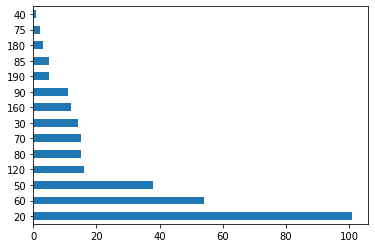

In [132]:
x.MSSubClass.value_counts().plot.barh()


## Comments
You might remember from last lesson that one of the predictors we have is called Enclosure and this is an important one as we will see later. Let’s start by doing a histogram. One of the nice things about Pandas is it has built-in plotting capabilities.

### Can you remind me what enclosure is?


We do not know what it means and it does not matter. The whole purpose of this process is that we are going to learn about what things are (or at least what things are important and later on figure out what they are and how they are important). 

So we will start out knowing nothing about this dataset. We are just going to look at something called Enclosure that has something called EROPS and ROPS and we do not even know what this is yet.

All we know is that the only three that appear in any great quantity are OROPS, EROPS w AC, and EROPS. This is very common as a data scientist. You often find yourself looking at data that you are not that familiar with and you have to figure out which bits to study more carefully, which bits seem to matter, and so forth. 

In this case, at least know that EROPS AC, NO ROPS, and None or Unspecified we really do not care about because they basically do not exist. So we will focus on OROPS, EROPS w AC, and EROPS.

## Analyse More

In [133]:
"""
# Bulldozers

flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
#TAKE DATA FRAME GROUPED BY ENCLOSURE
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

"""

flds = ['MSSubClass', 'SalePrice', 'pred', 'pred_std']
#TAKE DATA FRAME GROUPED BY ENCLOSURE
enc_summ = x[flds].groupby('MSSubClass', as_index=False).mean()
enc_summ

,MSSubClass,SalePrice,pred,pred_std
0,20,12.090645,12.091379,0.138924
1,30,11.378909,11.462757,0.216832
2,40,12.468437,12.277197,0.252737
3,50,11.868310,11.848042,0.194240
4,60,12.308960,12.316474,0.129139
5,70,12.035962,11.968107,0.207944
6,75,11.824502,11.953221,0.169365
7,80,12.043220,11.963348,0.134230
8,85,11.827697,11.823819,0.126780
9,90,11.795565,11.827129,0.154182


## Comments

We can already start to learn a little here:

1. Prediction and the sale price are close to each other on average (good sign)

2. Standard deviation varies a little bit

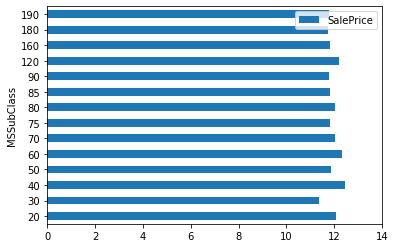

In [134]:
"""
#SALE PRICE EACH LEVEL OF CONCLOSURE

enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

"""


enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('MSSubClass', 'SalePrice', 'barh', xlim=(0,14));


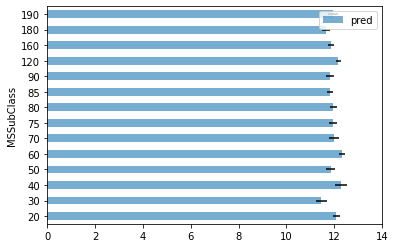

In [135]:
"""
#PREDUCION FOR EACH LEVEL OF ENCLOSURE ERROR BARS ARE Std DEV OF
#PREDICTION

enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

"""

#PREDUCION FOR EACH LEVEL OF ENCLOSURE ERROR BARS ARE Std DEV OF
#PREDICTION

enc_summ.plot('MSSubClass', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,14));

## Another Analysis 
We used the standard deviation of prediction for the error bars above. This will tell us if there is some groups or some rows that we are not very confident of at all. We could do something similar for **product size**:


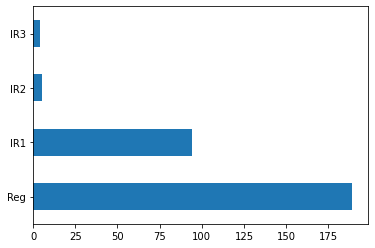

In [136]:


"""

#SIMILAR THING WITH PRODUCT SIZE

raw_valid.ProductSize.value_counts().plot.barh();
"""

raw_valid.LotShape.value_counts().plot.barh();


In [137]:
flds = ['LotShape', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
LotShape,,,
IR1,12.208943,12.180900,0.151942
IR2,12.393399,12.408276,0.155943
IR3,12.133389,12.351400,0.192602
Reg,11.933358,11.939236,0.149462


## How to interpret we will se Example

You expect, on average, when you are predicting something that is a bigger number your standard deviation would be higher. So you can 

#### sort by the ratio of the standard deviation of the predictions to the predictions themselves 

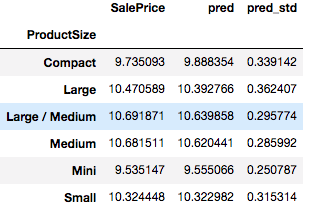

In [138]:
Image("images/des6.png")


In [139]:

#TAKE LAST TWO COLUMN RATIO
#YOU CAN SSEE FOR LARGE AND COMPACT PREDICTIONS ARE LESS ACCURATE
#BECAUSE ALMOST SAME VALUE ..FOR THE HISTOGRAM YOU CAN SEE ITS SMALL
#SMALL GROUPS WE ARE having less good job


"""
Benefits 

1. group up like this confidence interval like this

you can check out for which group you are confident


"""



(summ.pred_std/summ.pred).sort_values(ascending=False)

LotShape
IR3    0.015594
IR2    0.012568
Reg    0.012519
IR1    0.012474
dtype: float64

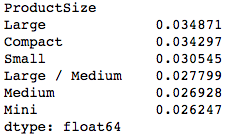

In [140]:
Image("images/des7.png")


### Interpretation of Confidence Interval 

(sort by the ratio of the standard deviation of the predictions to the predictions themselves)

What this tells us is that product size Large and Compact , our predictions are less accurate (relatively speaking as a ratio of the total price). 

**So if we go back and have a look, you see why. These are the smallest groups in the histogram. As you would expect, in small groups, we are doing a less good job.**

You can use this confidence interval for two main purposes:

1. You can look at the average confidence interval by group to find out if there are groups you do not seem to have confidence about.

2. Perhaps more importantly, you can look at them for specific rows. When you put it in production, you might always want to see the confidence interval. For example, if you are doing credit scoring to decide whether to give somebody a loan, you probably want to see not only what their level of risk is but how confident we are. If they want to borrow lots of money and we are not at all confident about our ability to predict whether they will pay back, we might want to give them a smaller loan.

## Feature importance

The feature importance tells us in this random forest, which columns mattered. We have dozens of columns in this dataset, and here, we are picking out the top 10. rf_feat_importance is part of Fast.ai library which takes a model m and dataframe df_trn (because we need to know names of columns) and it will give you back a Pandas dataframe showing you in order of importance how important each column was.

In [141]:

#tells us which column matters fi[10] is the top ten
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
17,OverallQual,0.378781
46,GrLivArea,0.152310
19,YearBuilt,0.091396
61,GarageCars,0.042718
38,TotalBsmtSF,0.040676
43,1stFlrSF,0.033779
62,GarageArea,0.029813
34,BsmtFinSF1,0.019628
27,ExterQual,0.016006
4,LotArea,0.015059


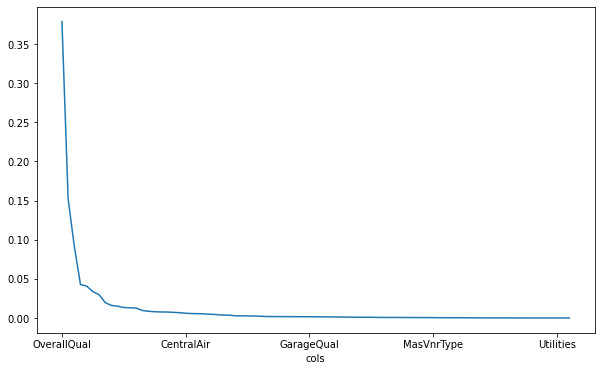

In [142]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

## Comments

Since fi is a DataFrame, we can use DataFrame plotting commands . The important thing is to see that some columns are really important and most columns do not really matter at all. In nearly every dataset you use in real life, this is what your feature importance is going to look like. There is only a handful of columns that you care about, and this is why Jeremy always starts here. At this point, in terms of looking into learning about this domain of heavy industrial equipment auctions, we only have to care about learning about the columns which matter. Are we going to bother learning about Enclosure? Depends whether Enclosure is important. It turns out that it appears in top 10, so we are going to have to learn about Enclosure

In [143]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

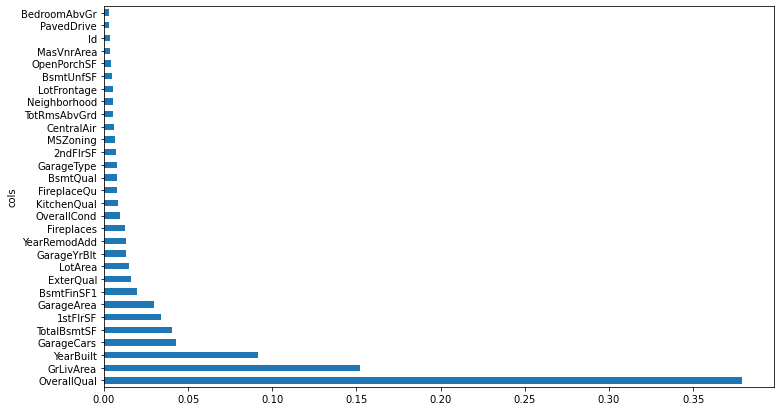

In [144]:
plot_fi(fi[:30]);

## Purpose Behind Analysis


**talk with client about specific column**

**university competetion talk**

**missing value in imp column matters**

**the people whose application rejeccted they did not fill the value
data leakage**



The most important thing to do with this is to now sit down with your client, your data dictionary, or whatever your source of information is and say to then “okay, tell me about YearMade. What does that mean? Where does it come from?”  Plot lots of things like histogram of YearMade and scatter plot of YearMade against price and learn everything you can because YearMade and Coupler_System — they are the things that matter.



What will often happen in real-world projects is that you sit with the the client and you’ll say “it turns out the Coupler_System is the second most important thing” and they might say “that makes no sense.” That doesn’t mean that there is a problem with your model, it means there is a problem with their understanding of the data they gave you.
Let me give you an example . 


### Case Study (Missing Values Were Predicted)

I entered a Kaggle competition where the goal was to predict which applications for grants at a university would be successful. I used this exact approach and I discovered a number of columns which were almost entirely predictive of the dependent variable. Specifically, when 


**I then looked to see in what way they are predictive, it turned out whether they were missing or not was the only thing that mattered in his dataset.**


I ended up winning that competition thanks to this insight. Later on, I heard what had happened. It turns out that at that university, there is an administrative burden to fill any other database and so for a lot of the grant applications, 

#### Reason
they do not fill in the database for the folks whose applications were not accepted.


In other words, these missing values in the dataset were saying this grant wasn’t accepted because if it was accepted then the admin folks will go in and type in that information. This is what we call data leakage. 


### Data leakage ( I am filling missing value which is not valuable)

means there is information in the dataset that I was modeling with which the university would not have had in real life at that point in time they were making a decision. When they are actually deciding which grant applications to prioritize, they do not know which ones the admin staff will later on going to add information to because it turns out that they were accepted.



One of the key things you will find here is data leakage problems and that is a serious problem you need to deal with . The other thing that will happen is you will often find its signs of collinearity.

### what is not data Leakage
It seems like what happened with Coupler_System. Coupler_System tells you whether or not a particular kind of heavy industrial equipment has a particular feature on it. But if it is not that kind of industrial equipment at all, it will be missing. 


So it indicates whether or not it is a certain class of heavy industrial equipment. This is not data leakage. This is an actual information you actually have at the right time. You just have to be careful interpreting it. So you should go through at least the top 10 or look for where the natural break points are and really study these things carefully.
To make life easier, it is sometimes good to throw some data away and see if it make any difference. In this case, we have a random forest which was .889 r². Here we filter out those where the importance is equal to or less than 0.005 (i.e. only keep the one whose importance is greater than 0.005


In [145]:
#filter importance > 0.005
#Single feature vs feature interaction is importance

#year Made and sale date

#column appear twice feature =0.5 shuffling dont matter

#collinearity importance


to_keep = fi[fi.imp>0.005].cols; len(to_keep)

24

In [146]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [147]:
# r^2 didnt change 2nd last column value compare with the above

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=25, max_features="sqrt",
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.15776691045454685, 0.17037318665699933, 0.8454510524266542, 0.8102333997539475, 0.8104636521410877]



## Score Interpetation


The r² did not change much — it actually increased a tiny bit. Generally speaking, removing redundant columns should not make it worse. 

If f it makes it worse, they were not redundant after all. It might make it a little bit better because if you think about how we built these trees, when it is deciding what to split on, it has less things to worry about trying, it is less often going to accidentally find a crappy column.

So there is slightly better opportunity to create a slightly better tree with slightly less data, but it is not going to change it by much. But it is going to make it a bit faster and it is going to let us focus on what matters. Let’s re-run feature importance on this new result 

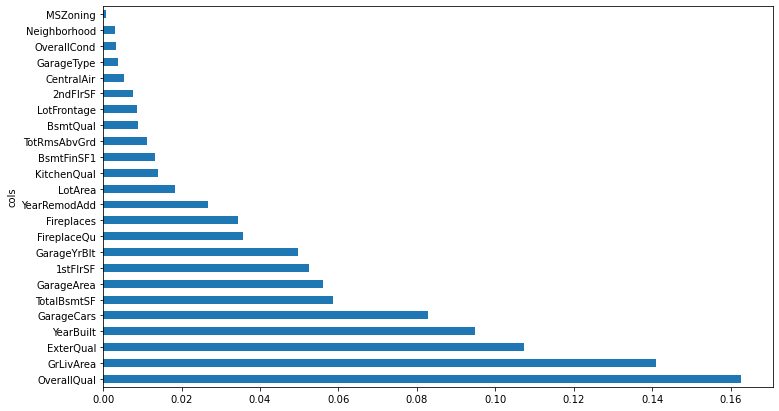

In [148]:
#when you remove redundunt element you also remove colinearity
#may be two columns are relative
#wont make random forest less predictive
#1:16:00 because same split column behave same
#removing one doesnt even matter feature importance clear

#compare coupler system year male in above graph and here
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);
#see the kecture 1:19 how important year made is shuffle yearmade 


## Affect of Collinearity

Key thing that has happened is that when you remove redundant columns, you are also removing sources of collinearity. In other words, two columns that might be related to each other. Collinearity does not make your random forests less predictive, but if you have a column A is a little bit related to a column B, and B is a strong driver of the independent, what happens is that the importance is going to be split between A and B. By removing some of those columns with very little impact, it makes your feature importance plot clearer. Before YearMade was pretty close to Coupler_System. But there must have been a bunch of things that are collinear with YearMade and now you can see YearMade really matters. This feature importance plot is more reliable than the one before because it has a lot less collinearity to confuse us.



## Feature Importance By Random Shuffle Technique

Not only is it really simple, it is a technique you can use not just for random forests but for basically any kind of machine learning model. Interestingly, almost no one knows this. Many people will tell you there is no way of interpreting this particular kind of model (the most important interpretation of a model is knowing which things are important) and that is almost certainly not going to be true because the technique I am going to teach you actually works for any kind of models.



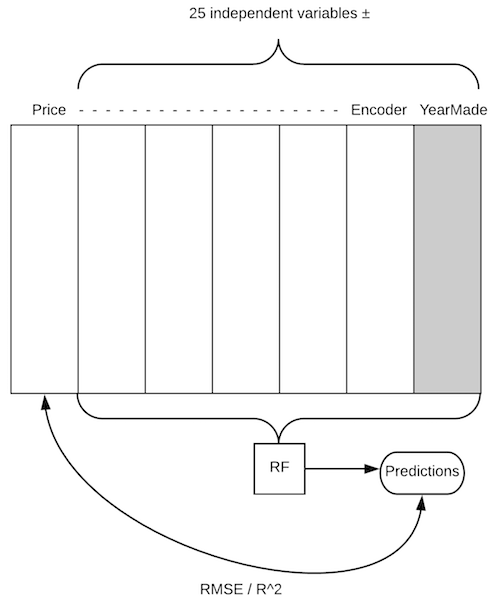

In [149]:
Image("images/des8.png")



1. We take our bulldozer data set and we have a column Price we are trying to predict (dependent variable).



2. We have 25 independent variables and one of them is YearMade.



3. How do we figure out how important YearMade is? We have a whole random forest and we can find out our predictive accuracy. So we will put all these rows through our random forest, and it will spit out some predictions. We will then compare them to the actual price (in this case, we get our root mean squared error and r²). This is our starting point.



4. Let’s do exactly the same thing, but this time, take the YearMade column and randomly shuffle it (i.e. randomly permute just that column). Now YearMade has exactly the same distribution as before (same mean, same standard deviation). But it has no relationships with our dependent variable at all because we totally randomly reordered it.



5. Before, we might have found our r² was .89. After we shuffle YearMade, we check again, and now r² is .80. The score got much worse when we destroyed that variable.



6. Okay, let’s try again. We put YearMade back to how it was, and this time let’s take Enclosure and shuffle that. This time, r²is .84 and we can say the amount of decrease in our score for YearMade was .09 and the amount of decrease for Enclosure was .05. And this is going to give us our feature importances for each column.

## Can’t we just exclude the column and check the decay in performance?

You could remove the column and train a whole new random forest, but that is going to be really slow. Where else this way, we can keep our random forest and just test the predictive accuracy of it again. So this is nice and fast by comparison. In this case, we just have to rerun every row forward through the forest for each shuffled column.


## Interaction Effect

#### If you want to do multi-collinearity, would you do two of them and random shuffle and then three of them 

 don’t think you mean multi-collinearity, I think you mean looking for interaction effects. So if you want to say which pairs of variables are most important, you could do exactly the same thing each pair in turn. In practice, there are better ways to do that because that is obviously computationally pretty expensive and so we will try to find time to do that if we can.


## TASK
We now have a model which is a little bit more accurate and we have learned a lot more about it. So we are out of time and what I would suggest you try doing now before next class for this bulldozers dataset is going through the top 5 or 10 predictors and try and learn what you can about how to draw plots in Pandas and try to come back with some insights about things like:


**what is the relationship between YearMade and the dependent variable **


**what is the histogram of YearMade **

**now that you know YearMade is really important, check if there is some noise in that column which we could fix**


**Check if there is some weird encoding in that column we can fix
**

**This idea Jeremy had that maybe Coupler_System is there entirely because it is collinear with something else, you might want try and figure out if it’s true. If so, how would you do it?
**


**fiProductClassDesc that rings alarm bells — it sounds like it might be a high cardinality categorical variable. It might be something with lots and lots levels because it sounds like it is a model name. So go and have a look at that model name — does it have some order into it? Could you make it an ordinal variable to make it better? Does it have some kind of hierarchical structure in the string that we can split it on hyphen to create more sub columns.**

In [150]:
"""
I wanna see how important it is 
shuffle it mean and std dev become same

do this for each column


decay performace


Interaction effect

pair of colums randomize them



compare two graphs year made is much better 


amd coupler system is better with product size equally imp 
with next year


Two reason VAlidation score not good

#1 go to confidence based tree variance
overfitting  = oob get worse
 
 create validation set of random sample 
 do that
 if got much worse then it must be overfitting
 
#2

oob not worse validation score get worse
it means true training but not validation

happens when validation set not random sample

"""

'\nI wanna see how important it is \nshuffle it mean and std dev become same\n\ndo this for each column\n\n\ndecay performace\n\n\nInteraction effect\n\npair of colums randomize them\n\n\n\ncompare two graphs year made is much better \n\n\namd coupler system is better with product size equally imp \nwith next year\n\n\nTwo reason VAlidation score not good\n\n#1 go to confidence based tree variance\noverfitting  = oob get worse\n \n create validation set of random sample \n do that\n if got much worse then it must be overfitting\n \n#2\n\noob not worse validation score get worse\nit means true training but not validation\n\nhappens when validation set not random sample\n\n'

### Summarize the relationship between the hyper parameters of the random forest and its effect on overfitting, dealing with collinearity,

Hyper parameters of interest:
1. set_rf_samples
 >Determines how many rows are in each tree. So before we start a new tree, we either bootstrap a sample (i.e. sampling with replacement from the whole thing) or we pull out a subsample of a smaller number of rows and then we build a tree from there.
 
 >Step 1 is we have our whole big dataset, we grab a few rows at random from it, and we turn them into a smaller dataset. From that, we build a tree.



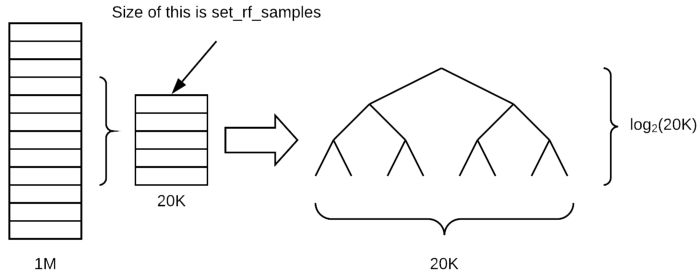

In [151]:
Image("images/des9.png")


## Depth of Tree

Assuming that the tree remains balanced as we grow it, how many layers deep will this tree be (assuming we are growing it until every leaf is of size one)? **log2(20000)**. The depth of the tree doesn’t actually vary that much depending on the number of samples because it is related to the log of the size.

## Number of Leafs

Once we go all the way down to the bottom, how many leaf nodes would there be? 20K. We have a linear relationship between the number of leaf nodes and the size of the sample. So when you decrease the sample size, there are less final decisions that can be made. Therefore, the tree is going to be less rich in terms of what it can predict because it is making less different individual decisions and it also is making less binary choices to get to those decisions.

## RF samples lower Tradeoff

Setting RF samples lower is going to mean that **you overfit less**, but it also means that you are going to have a **less accurate individual tree model**. 


### Suggestion

The way Breiman, the inventor of random forest, described this is that you are trying to do two things when you build a model with bagging. One is that each individual tree/estimator is as accurate as possible **(so each model is a strong predictive model).** 

But then the across the estimators, **correlation between them is as low as possible** so that when you average them out together, you end up with something that generalizes. 

### Final Comment

**By decreasing the set_rf_samples number, we are actually decreasing the power of the estimator and increasing the correlation** — so is that going to result in a better or worse validation set result for you? It depends. This is the kind of compromise which you have to figure out when you do machine learning models.


## OOB Review

A question about oob=True . All oob=True does is it says whatever your subsample is (it might be a bootstrap sample or a subsample), take all of the other rows (for each tree), put them into a different data set, and calculate the error on those. So it doesn’t actually impact training at all. It just gives you an additional metric which is the OOB error. So if you don’t have a validation set, then this allows you to get kind of a quasi validation set for free.



## set_rf_sample

Question: If I don’t do set_rf_samples, what would it be called?  The default is, if you say reset_rf_samples, that causes it to bootstrap, so it will sample a new dataset as big as the original one but with replacement.

The second benefit of set_rf_samples is that you can run more quickly. Particularly if you are running on a really large dataset like a hundred million rows, it will not be possible to run it on the full dataset. So you would either have to pick a subsample yourself before you start or you set_rf_samples.



## min_samples_leaf Relationship with Leafs & Depth


Before, we assumed that min_samples_leaf=1, if it is set to **2**, the new depth of the tree is **log2(20000)-1**. 

**Each time we double the min_samples_leaf , we are removing one layer from the tree, and halving the number of leaf nodes (i.e. 10k).**

The result of increasing min_samples_leaf is that now each of our leaf nodes has more than one thing in, so we are going to get a more stable average that we are calculating in each tree.


### This could make Tree Less  corelated and avoid Overfitting

We have a little less depth (i.e. we have less decisions to make) and we have a smaller number of leaf nodes. So again, we would expect the result of that node would be that each estimator would be less predictive, but the estimators would be also less correlated. So this might help us avoid overfitting.


## every leaf node will have exactly two nodes ?

No, it won’t necessarily have exactly two. The example of uneven split such as a leaf node containing 100 items is when they are all the same in terms of the dependent variable (suppose either, but much more likely would be the dependent). So if you get to a leaf node where every single one of them has the same auction price, or in classification every single one of them is a dog, then there is no split that you can do that’s going to improve your information. Remember, information is the term we use in a general sense in random forest to describe the amount of difference about the additional information we create from a split is how much we are improving the model. So you will often see this word information gain which means how much better the model got by adding an additional split point, and it could be based on RMSE or cross-entropy or how different to the standard deviations, etc.


## speed up

So that is the second thing that we can do. It’s going to speed up our training because it has one less set of decisions to make. Even though there is one less set of decisions, those decisions have as much data as the previous set. So each layer of the tree can take twice as long as the previous layer. So it could definitely speed up training and generalize better.


## max_features vs set_rf_samples

At each split, it will randomly sample columns (as opposed to set_rf_samples pick a subset of rows for each tree). It sounds like a small difference but it’s actually quite a different way of thinking about it. 

We do set_rf_samples so we pull out our sub sample or a bootstrap sample and that’s kept for the whole tree and we have all of the columns in there. 

**With max_features=0.5, at each split, we’d pick a different half of the features.**


The **reason** we do that is because we want the trees to be as **rich** as possible. Particularly, if you were only doing a small number of trees (e.g. 10 trees) and you picked the same column set all the way through the tree, you are not really getting much variety in what kind of things it can find. So this way, at least in theory, seems to be something which is going to give us a better set of trees by picking a different random subset of features at every decision point.


#### Summary

The overall effect of the max_features is the same — it’s going to mean that each individual tree is probably going to be less accurate but the trees are going to be more varied. In particular, here this can be critical because imagine that you got one feature that is just super predictive. It’s so predictive that every random subsample you look at always starts out by splitting on that same feature then the trees are going to be very similar in the sense they all have the same initial split. But there may be some other interesting initial splits because they create different interactions of variables. So by half the time that feature won’t even be available at the top of the tree, at least half the tree are going to have a different initial split. It definitely can give us more variation and therefore it can help us to create more generalized trees that have less correlation with each other even though the individual trees probably won’t be as predictive.



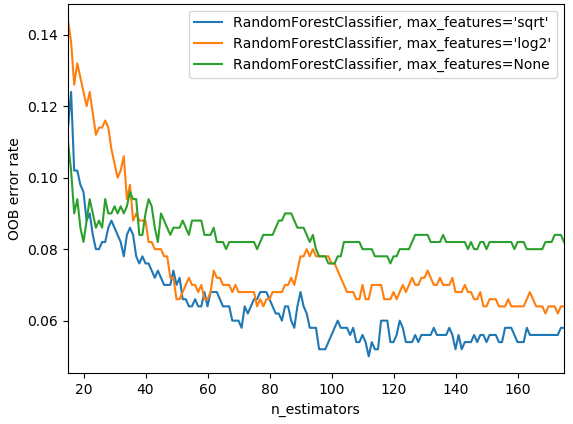

In [152]:
Image("images/des10.png")


## Discussion Ended Here For Max Tree

In practice, as you add more trees, if you have **max_features=None**, that is going to use all the features every time. Then with very few trees, that can still give you a pretty good error. 

But as you create more trees, it’s not going to help as much because they are all pretty similar as they are all trying every single variable.

Where else, if you say **max_features=sqrt** or **log2** , then as we add more estimators, we see improvements so there is an interesting interaction between those two. The chart above is from scikit-learn docs.


## Things which do not impact our training at all 


1. n_jobs: simply specifies how many CPU or cores we run on, so it’ll make it faster up to a point. Generally speaking, making this more than 8 or so, they may have diminishing returns. -1 says use all of your cores. It seems weird that the default is to use one core. You will definitely get more performance by using more cores because all of you have computers with more than one core nowadays.


2. oob_score=True: This simply allows us to see OOB score. If you had set_rf_samples pretty small compared to a big dataset, OOB is going to take forever to calculate. Hopefully at some point, we will be able to fix the library so that doesn’t happen. There is no reason that need to be that way, but right now, that’s how the library works.

3. So they are our key basic parameters we can change. There are more that you can see in the docs or shift+tab to have a look at them, but the ones you’ve seen are the ones that I’ve found useful to play with so feel free to play with others as well. Generally speaking, these values work well:


**max_features: None, 0.5, sqrt, log2**


4. min_samples_leaf : 1, 3, 5, 10, 25, 100… As you increase, if you notice by the time you get to 10, it’s already getting worse then there is no point going further. If you get to 100 and it’s still going better, then you can keep trying.

## Random Forest Interpretation  ( Kaggle View Point)

Random forest interpretation is something which you could use to create some really cool Kaggle kernels. Confidence based on tree variance is something which doesn’t exist anywhere else. Feature importance definitely does and that’s already in quite a lot of Kaggle kernels. If you are looking at a competition or a dataset where nobody’s done feature importance, being the first person to do that is always going to win lots of votes because the most important thing is which features are important.


## Confidence based on tree variance


As I mentioned, when we do model interpretation, I tend to set_rf_samples to some subset — something small enough that I can run a model in under 10 seconds because there is no point running a super accurate model. Fifty thousand is more than enough to see each time you run an interpretation, you’ll get the same results back and so as long as that’s true, then you are already using enough data.




In [153]:
"""

set_rf_samples(50000)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
        max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)
"""

'\n\nset_rf_samples(50000)\nm = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, \n        max_features=0.5, n_jobs=-1, oob_score=True)\nm.fit(X_train, y_train)\nprint_score(m)\n'

## Review Feature Importance


## Feature Importance



We learnt it works by randomly shuffling a column, each column one at a time, then seeing how accurate the pre-trained model is when you pass that in all the data as before but with one column shuffled.
Some of the questions I got after class reminded me that it is very easy to under appreciate how powerful and magic this approach is. To explain, I’ll mention a couple of the questions I heard.



### One question was
#### “what if we just took one column at a time, and created a tree on just that column”.

Then we will see which column’s tree is the most predictive. Why may that give misleading results about feature importance? We are going to lose the interactions between the features. If we just shuffle them, it will add randomness and we are able to both capture the interactions and the importance of the feature. This issue of interaction is not a minor detail. It is massively important. Think about this bulldozers dataset where, for example, there is one field called “year made” and another field called “sale date.” If we think about it, it’s pretty obvious that what matters is the combination of these two. In other words, the difference between the two is how old the piece of the equipment was when it got sold. So if we only included one of these, we are going to massively underestimate how important that feature is. Now, here is a really important point though. 

## Advice to Check Interaction
It’s pretty much always possible to create a simple logistic regression which is as good as pretty much any random forest if you know ahead of time exactly what variables you need, exactly how they interact, exactly how they need to be transformed. 

In this case, for example, we could have created a new field which was equal to sale year minus year made and we could have fed that to a model and got that interaction for us.

But the point is, we never know that. You might have a guess of it — I think some of these things are interacting in this way, and I think this thing we need to take the log, and so forth. But the truth is that the way the world works, the causal structures, they have many many things interacting in many many subtle ways. That’s why using trees, whether it be gradient boosting machines or random forests, work so well.


## What if all Column have same Importance

Terrance’s comment: One thing that bit me years ago was also I tried doing one variable at a time thinking “oh well, I’ll figure out which one’s most correlated with the dependent variable” . But what it doesn’t pull apart is that what if all variables are basically copied the same variable then they are all going to seem equally important but in fact it’s really just one factor.


### Jermy Comment on this

That is also true here. If we had a column appear twice, then shuffling that column isn’t going to make the model much worse. If you think about how it’s built, particularly if we had max_features=0.5, some of the times, we are going to get version A of the column, some of the times, we are going to get version B of the column. 

So half the time, shuffling version A of the column is going to make a tree a bit worse, half the time it’s going to make column B it’ll make it a bit worse, and so it’ll show that both of those features are somewhat important. And it will share the importance between the two features. 

So this is why **“collinearity”** (I write collinearity but it means that they are linearly related, so this isn’t quite right) — but this is why having two variables that are closely related to each other or more variables that are closely related to each other means that you will often underestimate their importance using this random forest technique.


## Question: Once we’ve shuffled and we get a new model, what exactly are the units of these importance?

Is this a change in the R² ? It depends on the library we are using. So the units are kind of like… I never think about them. I just know that in this particular library, 0.005 is often a cutoff I would tend to use. But all I actually care about is this picture (the feature importance ordered for each variable):


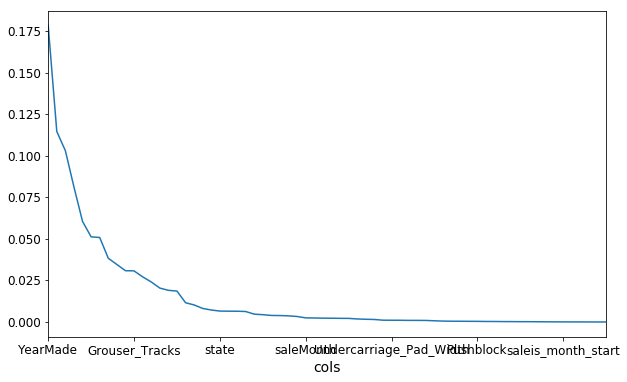

In [154]:
Image("images/des11.png")


Then zooming in, turning it into a bar plot and then find where it becomes flat (~0.005).

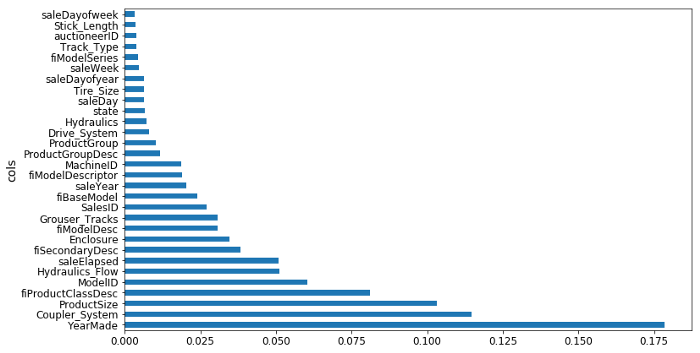

In [155]:
Image("images/des12.png")


So I removed them at that point and check the validation score didn’t get worse.

In [156]:
"""
to_keep = fi[fi.imp>0.005].cols; len(to_keep)


"""

'\nto_keep = fi[fi.imp>0.005].cols; len(to_keep)\n\n\n'

If it did get worse, I will just decrease the cutoff a little bit until it doesn’t get worse. So the units of measure of this don’t matter too much. We will learn later about a second way of doing variable importance, by the way.


## What is the purpose of removing them ?

Having looked at our feature importance plot, we see the ones less than 0.005 is this long tail of boringness. So I said let’s just try grabbing the columns where it is greater than 0.005, create a new data frame called df_keep which is df_train with just those kept columns, create a new training and validation sets with just those columns, create a new random forest, and look to see how the validation set score. And the validation set RMSE changed and they got a bit better. So if they are about the same or a tiny bit better then my thinking is well this is just as good a model, but it’s now simpler.

So when I redo the feature importance, there is less collinearity. In this case, I saw that year made went from being a bit better than the next best thing (coupler system), but now it’s way better. So it did seem to definitely change these feature importances and hopefully give me some more insight there.


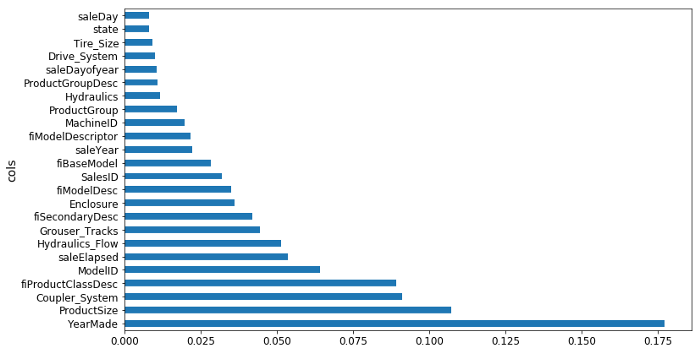

In [157]:
Image("images/des13.png")


## So how did that help our model

We are going to dig into that now. Basically it tells us that, for example, if we are looking for how we are dealing with missing value, is there noise in the data, if it is a high cardinality categorical variable — they are all different steps we would take. So for example, if it was a high cardinality categorical variable that was originally a string, maybe fiProductClassDesc in above case, I remember one of the ones we looked at the other day had first of all was the type of vehicle and then a hyphen, and then the size of the vehicle. We might look at that and say “okay, that was an important column. Let’s try splitting it into two on hyphen and then take that bit which is a size of it and parse it and convert it into an integer.” We can try and do some feature engineering. Basically until you know which ones are important, you don’t know where to focus that feature engineering time. You can talk to your client or folks that are responsible for creating this data. If you were actually working at a bulldozer auction company, you might now go to the actual auctioneers and say “I am really surprised that coupler system seems to be driving people’s pricing decisions so much. Why do you think that might be?” and they can say to you “oh, it’s actually because only these classes of vehicles have coupler systems or only this manufacturer has coupler systems. So frankly this is actually not telling you about coupler systems but about something else. Oh hey, that reminds me, that’s something else we actually have measured that. It is in this different CSV file. I’ll go get it for you.” So it helps you focus your attention.

## I have Skipped Something (see Document)



## One-hot encoding

**it could be that just one of the levels of category is actually interesting. Maybe the only thing that mattered was whether it was unknown. **

**Avoid Tree Depth** 

1. There is something else that we can do, however, which is we can do something called one hot encoding. So this is going to where we were talking about categorical variable. Remember, a categorical variable, let’s say we had a string high, low, medium (the order we got was kind of weird — in alphabetical order by default). So we mapped it to 0, 1, 

2. By the time it gets into our data frame, it’s now a number so the random forest doesn’t know that it was originally a category — it’s just a number. So when the random forest is built, it basically says oh is it greater than 1 or not. Or is it greater than naught or not. They are basically the two possible decisions it could have made. For something with 5 or 6 bands, it could be that just one of the levels of category is actually interesting. Maybe the only thing that mattered was whether it was unknown. Maybe not knowing its size somehow impacts the price. So if we wanted to be able to recognize that and particularly if it just so happened that the way that the numbers were coded was it unknown ended up in the middle, then it going to take two splits to get to the point where we can see that it’s actually unknown that matters. So this is a little inefficient and we are wasting tree computation. Wasting tree computation matters because every time we do a split, we are halving the amount of data at least that we have to do more analysis. So it’s going to make our tree less rich and less effective if we are not giving the data in a way that is convenient for it to do the work it needs to do.


What we could do instead is create 6 columns for each category and each column would contain 1’s and 0’s. Having added 6 additional columns to our dataset, the random forest now has the ability to pick one of these and say oh, let’s have a look at is_unknown. There is one possible fit I can do which is 1 vs. 0. Let’s see that’s any good. So it now has the ability in a single step to pull out a single category level and this kind of coding is called one-hot encoding. For many types of machine learning model, something like this is necessary. If you are doing logistic regression, you can’t possibly put in a categorical variable that goes naught through five because there is obviously no written linear relationship between that and anything. So one hot encoding, a lot of people incorrectly assume that all machine learning requires one hot encoding. But in this case, I’m going to show you how we could use it optionally and see whether it might improve things sometimes.



## Question: If we have six categories like in this case, would there be any problems with adding a column for each of the categories? In linear regression, if there are six categories, we should only do it for five of them .

You certainly can say let’s not worry about adding is_medium because we can infer it from the other five. I would say include it anyway because otherwise, the random forest has to make five decisions to get to that point. The reason you need to not include one in linear models is because linear models hate collinearity but we don’t care about that here.
So we can do one hot encoding easily enough and the way we do it is we pass one extra parameter to proc_df which is what is the max number of categories (max_n_cat). So if we say it’s seven, then anything with less than seven levels is going to be turned into a one-hot encoded bunch of columns.



proc_df's optional *max_n_cat* argument will turn some categorical variables into new columns.

For example, the column **ProductSize** which has 6 categories:

* Large
* Large / Medium
* Medium
* Compact
* Small
* Mini

gets turned into 6 new columns:

* ProductSize_Large
* ProductSize_Large / Medium
* ProductSize_Medium
* ProductSize_Compact
* ProductSize_Small
* ProductSize_Mini

and the column **ProductSize** gets removed.

It will only happen to columns whose number of categories is no bigger than the value of the *max_n_cat* argument.

Now some of these new columns may prove to have more important features than in the earlier situation, where all categories were in one column.



Like zip code has more than six levels so that would be left as a number. Generally speaking, you obviously probably wouldn’t want to one hot encode zip code because that’s just going to create masses of data, memory problems, computation problems, and so forth. So this is another parameter you can play around with.



In [158]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=27, max_features="sqrt", n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.18391928456717527, 0.19186357098557863, 0.7899664136284574, 0.7593408764385456, 0.7551210002509103]


So if I try it out, run the random forest as per usual, you can see what happens to the R² of the validation set and to the RMSE of the validation set. In this case, I found it got a little bit worse. This isn’t always the case and it’s going to depend on your dataset. It depends on if you have a dataset where single categories tend to be quite important or not. In this particular case, it did not make it more predictive. However, what it did do is that we now have different features. proc_df puts the name of the variable, an underscore, and the level name. So interestingly, it turns out that before, it said that enclosure was somewhat important. When we do it as one hot encoded, it actually says Enclosure_EROPS w AC is the most important thing. So for at least the purpose of interpreting your model, you should always try one hot encoding quite a few of your variables. I often find somewhere around 6 or 7 pretty good. You can try making that number as high as you can so that it doesn’t take forever to compute and the feature importance doesn’t include really tiny levels that aren’t interesting. That is up to you to play around with, but in this case, I found this very interesting. It clearly tells me I need to find out what Enclosure_EROPS w AC is and why it is important because it means nothing to me right now but it is the most important thing. So I should go figure that out.

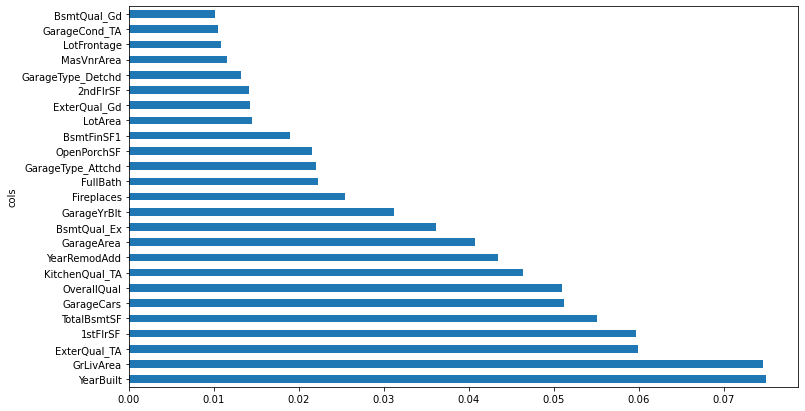

In [159]:
#see enclosure changes importance 
#what Enclosure erops is how it changes

fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

## Question
 Can you explain how changing the max number of category works? Because for me, it just seems like there are five categories or six categories . All it’s doing is is here is a column called zip code, usage band, and sex, for example. Say, zip code has 5,000 levels. The number of levels in a category, we call its “cardinality”. So it has a cardinality of 5,000. Usage band may have a cardinality of six. Sex has a cardinality of two. So when proc_df goes through and says okay, this is a categorical variable, should I one-hot encode it? It checks the cardinality against max_n_cat and says 5,000 is bigger than seven so I don’t one hot encode it. Then it goes to usage band — 6 is less than 7, so I do one hot encode it. It goes to sex, and 2 is less than 7, so one hot encode that too. So it just says for each variable, how I decide whether ton one hot encode it or not. Once we decide to one hot encode it, it does not keep the original variable.


## Important Note

If you have actually made an effort to turn your ordinal variables into proper ordinals, using proc_df can destroy that. The simple way to avoid that is if we know that we always want to use the codes for usage band, you could just go ahead and replace it:


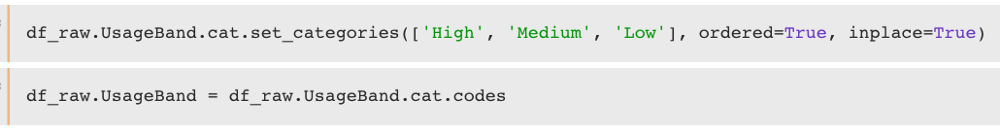

In [160]:
Image("images/des14.png")


In [161]:
#Now it’s an integer. So it will never get changed.


# Removing redundant features

One thing that makes this harder to interpret is that there seem to be some variables with very similar meanings. Let's try to remove redundent features.


We’ve already seen how variables which are basically measuring the same thing can confuse our variable importance. They can also make our random forest slightly less good because it requires more computation to do the same thing and there’re more columns to check. So we are going to do some more work to try and remove redundant features. The way I do that is to do something called “dendrogram”. And it is kind of hierarchical clustering.



## Cluster analysis 

is something where you are trying to look at objects, they can be either rows in the dataset or columns and find which ones are similar to each other. Often you will see people particularly talking about cluster analysis, they normally refer to rows of data and they will say “let’s plot it” and find clusters. A common type of cluster analysis, time permitting, we may get around to talking about this in some detail, is called k-means. It is basically where you assume that you don’t have any labels at all and you take a couple of data points at random and you gradually find the ones that are near to it and move them closer and closer to centroids, and you repeat it again and again. It is an iterative approach that you tell it how many clusters you want and it will tell you where it thinks that classes are.

A really under used technique (20 or 30 years ago it was much more popular than it is today) is a hierarchical clustering also known as agglomerated clustering. In hierarchical or agglomerated clustering, we look at every pair of objects and say which two objects are the closest. We then take the closest pair, delete them, and replace them with the midpoint of the two. Then repeat that again and again. Since we are removing points and replacing them with their averages, you are gradually reducing a number of points by pairwise combining. The cool thing is, you can plot that.


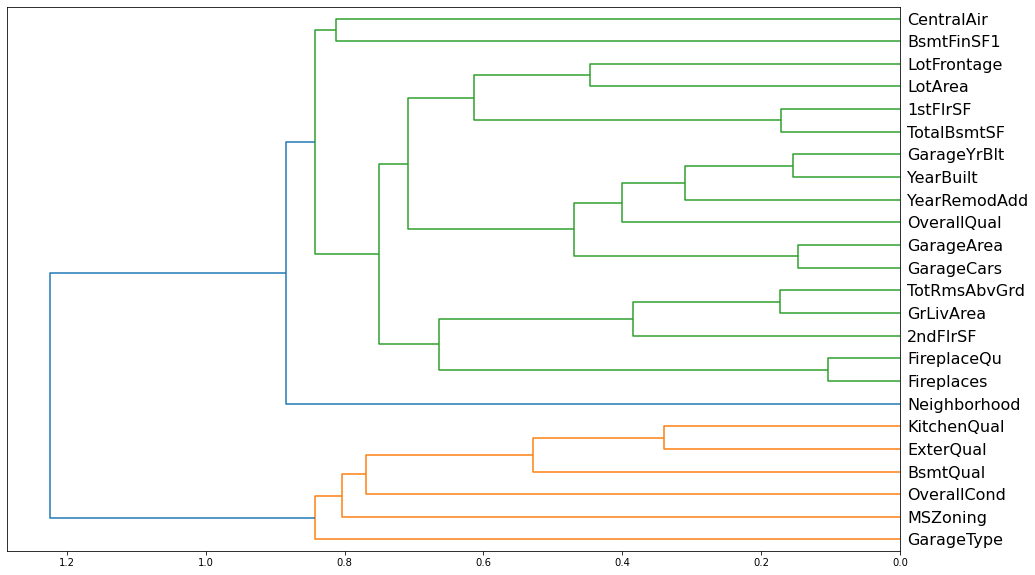

In [162]:
from scipy.cluster import hierarchy as hc

#sale year and sale elapsed are same

#rank co relation


#co relation matrix
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)

#standard steps for enjoining to clustring
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

## Cluster inference

Like so. Rather than looking at points, you look at variables and we can see which two variables are the most similar. saleYear and saleElapsed are very similar. So the horizontal axis here is how similar are the two points that are being compared. If they are closer to the right, that means that they are very similar. So saleYear and saleElapsed have been combined and they were very similar.


## Cluster Mechanism

In this case, I actually used Spearman’s R. You guys familiar with correlation coefficients already? So correlation is almost exactly the same as the R², but it’s between two variables rather than a variable and its prediction. The problem with a normal correlation is that if you have data that looks like this then you can do a correlation and you’ll get a good result.

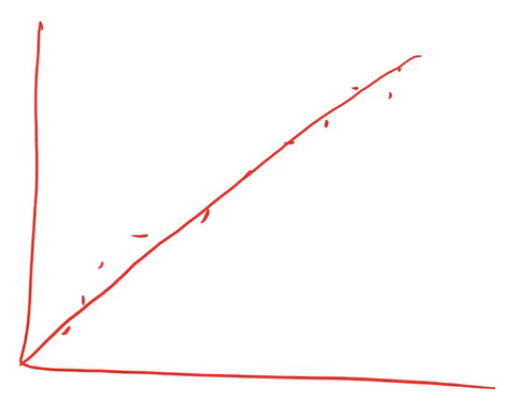

In [163]:
Image("images/des15.png")


But if you’ve got data which looks like this and you try and do a correlation (assuming linearity), that’s not very good.

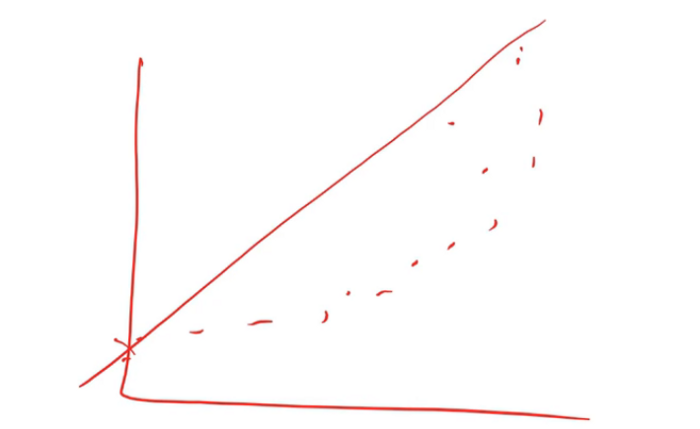

In [164]:
Image("images/des16.png")


So there is a thing called a rank correlation which is a really simple idea. Replace every point by its rank.

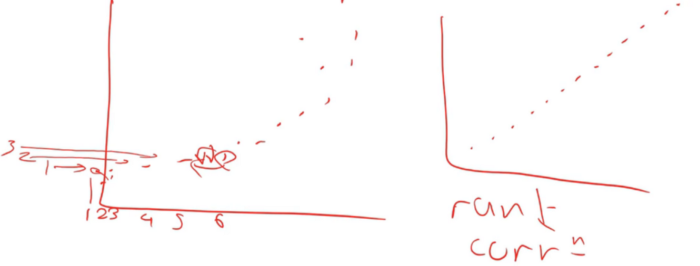

In [165]:
Image("images/des17.png")


## Rank Coorelation

From left to right, we rank from 1, 2, …6. Then you do the same for the y-axis. Then you create a new plot where you don’t plot the data but you plot the rank of the data. If you think about it, the rank of this dataset is going to look like an exact line because every time something was greater on the x-axis, it was also greater on the y-axis. So if we do a correlation on the rank, that’s called a rank correlation.


## Why Rank Corelation
Because we want to find the columns that are similar in a way that the random forest would find them similar (random forests do not care about linearity, they just care about ordering), so a rank correlation is the right way to think about that . So Spearman’s R is the name of the most common rank correlation. But you can literally replace the data with its rank and chuck it at the regular correlation and you will get basically the same answer. The only difference is in how ties are handled which is a pretty minor issue.



Once we have a correlation matrix, there is basically a couple of standard steps you do to turn that into a dendrogram which I have to look up on stackoverflow each time I do it. You basically turn it into a distance matrix and then you create something that tells you which things are connected to each other things hierarchically. So these are three standard steps you always have to do to create a dendrogram



## Inference from Cluster (Bulldozer Dataset)

Then you can plot it . saleYear and saleElapsed are measuring basically the same thing (at least in terms of rank) which is not surprising because saleElapsed is the number of days since the first day in my dataset so obviously these two are nearly entirely correlated. Grouser_Tracks, Hidraulics_Flow, and Coupler_System all seem to be measuring the same thing. This is interesting because remember, Coupler_System it said was super important. So this rather supports our hypothesis there is nothing to do with whether it’s a coupler system but whether it is whatever kind of vehicle it is has these kind of features. ProductGroup and ProductGroupDesc seem to be measuring the same thing, and so are fiBaseModel and fiModelDesc. Once we get past that, suddenly things are further away, so I’m probably going to not worry about those.


**So we are going to look into those four groups that are very similar.**



## Get OOB For Cluster Analysis (removing Redundant features)

What I then do is I take these groups and I create a little function get_oob (get Out Of Band score). It does a random forest for some data frame. I make sure that I have taken that data frame and split it into a training and validation set, and then I call fit and return the OOB score


In [166]:

#try remove one at time which make oob not worse
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

## My Technique (Imp) GetOOB

Basically what I’m going to do is try removing each one of these 9 or so variables one at a time and see which ones I can remove and it doesn’t make the OOB score get worse.


In [167]:
get_oob(df_keep)

0.8647720194236228

## Technique Explanation

And each time I run this, I get slightly different results so actually it looks like the last time I had 6 things and not 9 things. So you can see, I just do a loop through each of the things that I am thinking maybe I can get rid of this because it’s redundant and I print out the column name and the OOB score of a model that is trained after dropping that one column.



In [168]:
df_keep.head()

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,1stFlrSF,GarageArea,BsmtFinSF1,ExterQual,LotArea,...,KitchenQual,FireplaceQu,BsmtQual,GarageType,2ndFlrSF,MSZoning,CentralAir,TotRmsAbvGrd,Neighborhood,LotFrontage
0,7,1710,2003,2,856,856,548,706,3,8450,...,3,0,3,2,854,4,2,8,6,65.0
1,6,1262,1976,2,1262,1262,460,978,4,9600,...,4,5,3,2,0,4,2,6,25,80.0
2,7,1786,2001,2,920,920,608,486,3,11250,...,3,5,3,2,866,4,2,6,6,68.0
3,7,1717,1915,3,756,961,642,216,4,9550,...,3,3,4,6,756,4,2,7,7,60.0
4,8,2198,2000,3,1145,1145,836,655,3,14260,...,3,5,3,2,1053,4,2,9,16,84.0


In [169]:

"""

## For Bulldozers
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(df_keep.drop(c, axis=1)))
"""


for c in ('Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea'):
    print(c, get_oob(df_keep.drop(c, axis=1)))


Fireplaces 0.8583774085834368
FireplaceQu 0.8595059713863018
GarageCars 0.8607732479801943
GarageArea 0.8623647235586563


## Comments (Bulldozers)

The OOB score on my whole data frame is .89 and then after dropping each one of these things, basically none of them got much worse. saleElapsed is getting quite a bit worse than saleYear. Burt it looks like pretty much everything else, I can drop with only like a third decimal place problem. So obviously though, you’ve got to remember the dendrogram. Let’s take fiModelDesc and fiBaseModel, they are very similar to each other. So what this says isn’t that I can get rid of both of them, I can get rid of one of them because they are basically measuring the same thing.


## Now Try One on Each Group

So then I try it. Let’s try getting rid of one from each group




In [170]:
#group has 2 so each 1 in group i dropped
#check it does not get worse

to_drop = ['Fireplaces', 'GarageCars']
get_oob(df_keep.drop(to_drop, axis=1))


0.8643656294502844

In [171]:

to_drop = [ 'YearBuilt', 'GarageArea']
get_oob(df_keep.drop(to_drop, axis=1))


0.8605532531238442

## Comments (Results)

We’ve gone from .861 to .860, again, it’s so close as to be meaningless. So that sounds good. Simpler is better. So I’m now going to drop these columns from my data frame, and then I can try running the full model again.

In [172]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)


In [173]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns))


In [174]:
keep_cols = np.load('tmp/keep_cols.npy',allow_pickle=True)


In [175]:
df_keep = df_trn[keep_cols]


In [176]:
df_keep.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,BsmtFinSF1,ExterQual,LotArea,GarageYrBlt,YearRemodAdd,...,KitchenQual,FireplaceQu,BsmtQual,GarageType,2ndFlrSF,MSZoning,CentralAir,TotRmsAbvGrd,Neighborhood,LotFrontage
0,7,1710,2,856,856,706,3,8450,2003.0,2003,...,3,0,3,2,854,4,2,8,6,65.0
1,6,1262,2,1262,1262,978,4,9600,1976.0,1976,...,4,5,3,2,0,4,2,6,25,80.0
2,7,1786,2,920,920,486,3,11250,2001.0,2002,...,3,5,3,2,866,4,2,6,6,68.0
3,7,1717,3,756,961,216,4,9550,1998.0,1970,...,3,3,4,6,756,4,2,7,7,60.0
4,8,2198,3,1145,1145,655,3,14260,2000.0,2000,...,3,5,3,2,1053,4,2,9,16,84.0


## Partial dependence

o now I’m at the point where I want to try and really understand my data better by taking advantage of the model. And we are going to use something called partial dependence. Again, this is something that you could use in the Kaggle kernel and lots of people are going to appreciate this because almost nobody knows about partial dependence and it’s a very very powerful technique. What we are going to do is we are going to find out, for the features that are important, how do they relate to the dependent variable. Let’s have a look.

In [177]:
from pdpbox import pdp
from plotnine import *

Again, since we are doing interpretation, we will set set_rf_samples to 50,000 to run things quickly.

In [178]:
set_rf_samples(200)

## Individual Level Intrepetation

We’ll take our data frame, we will get our feature importance and notice that we are using max_n_cat because I am actually pretty interested in seeing the individual levels for interpretation.

In [179]:

df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

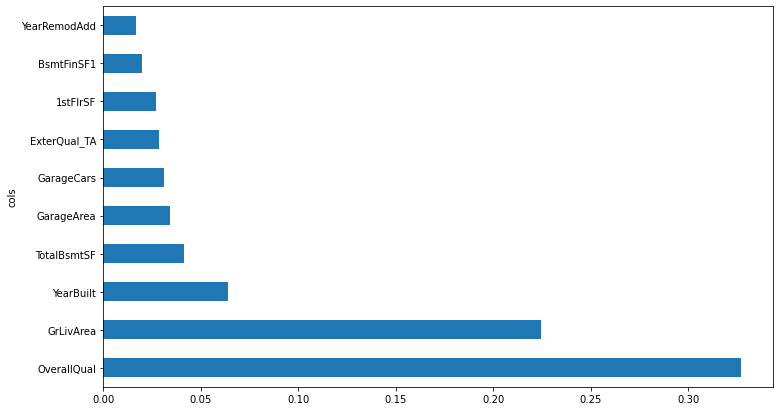

In [180]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]);

## What to plot

Let’s try to learn more about those top 10. YearMade is the second most important. So one obvious thing we could do would be to plot YearMade against saleElapsed because as we’ve talked about already, it seems to make sense that they are both important but it seems very likely that they are combined together to find how old was the product when it was sold. So we could try plotting YearMade against saleElapsed to see how they relate to each other

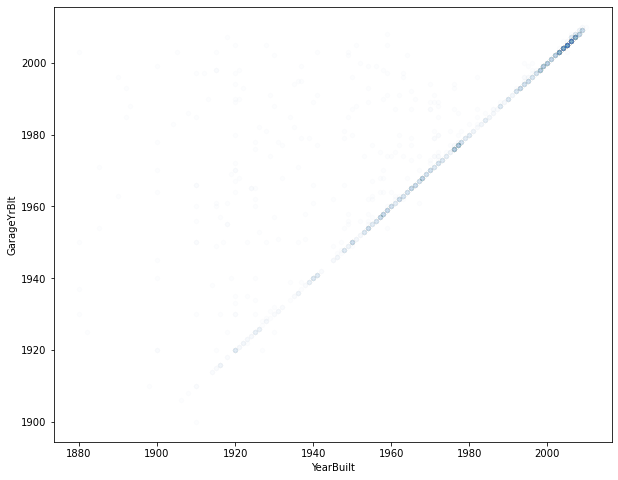

In [181]:
"""
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));
"""

df_raw.plot('YearBuilt', 'GarageYrBlt', 'scatter', alpha=0.01, figsize=(10,8));

And when we do, we get this very ugly graph [1:09:08]. It shows us that YearMade actually has a whole bunch that are a thousand. Clearly, this is where I would tend to go back to the client and say okay, I’m guessing that these bulldozers weren’t actually made in the year 1000 and they would presumably say to me “oh yes, they are ones where we don’t know where it was made”. Maybe “before 1986, we didn’t track that” or maybe “the things that are sold in Illinois, we don’t have that data provided”, etc — they will tell us some reason. So in order to understand this plot better, I’m just going to remove them from this interpretation section of the analysis. We will just grab things where YearMade is greater than 1930.

In [182]:
"""
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)

"""


'\nx_all = get_sample(df_raw[df_raw.YearMade>1930], 500)\n\n'

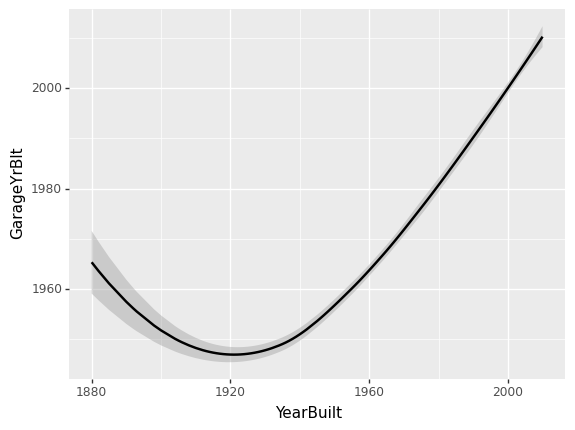

<ggplot: (-9223363265085048667)>

In [245]:
"""
ggplot(x_all, aes('YearMade', 'SalePrice'))+ stat_smooth(se=True, method='loess')

"""

ggplot(df_raw, aes('YearBuilt', 'GarageYrBlt'))+ stat_smooth(se=True, method='loess')

In [246]:
x = get_sample(X_train, 500)

In [247]:
#1960 ,1961...

#shuffling column..tell us how accurate it is when you dont use the column anymore


#replace column in constant how much we have sold that product for in that auction
# on that day in that place if this is made in 1961 then take average of all thr sale price
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


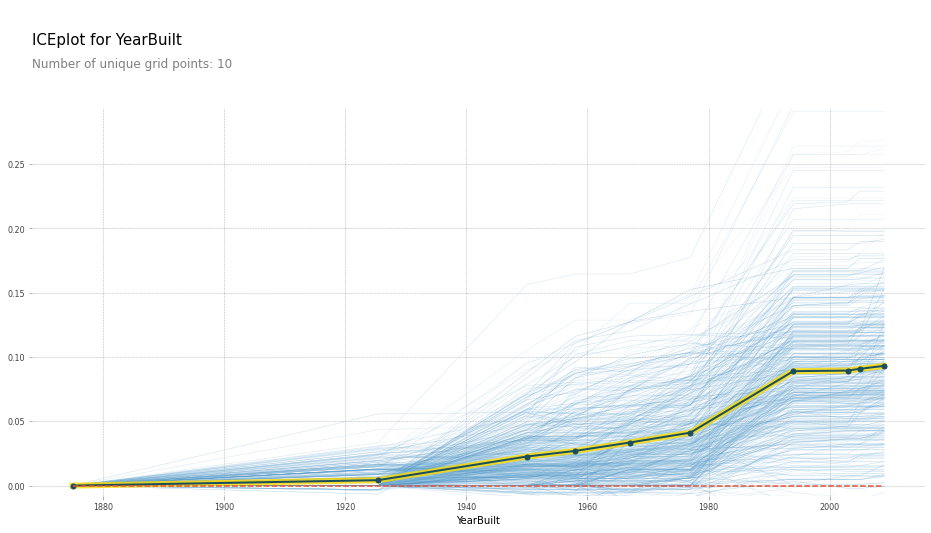

In [248]:
plot_pdp('YearBuilt')

## Cluster this



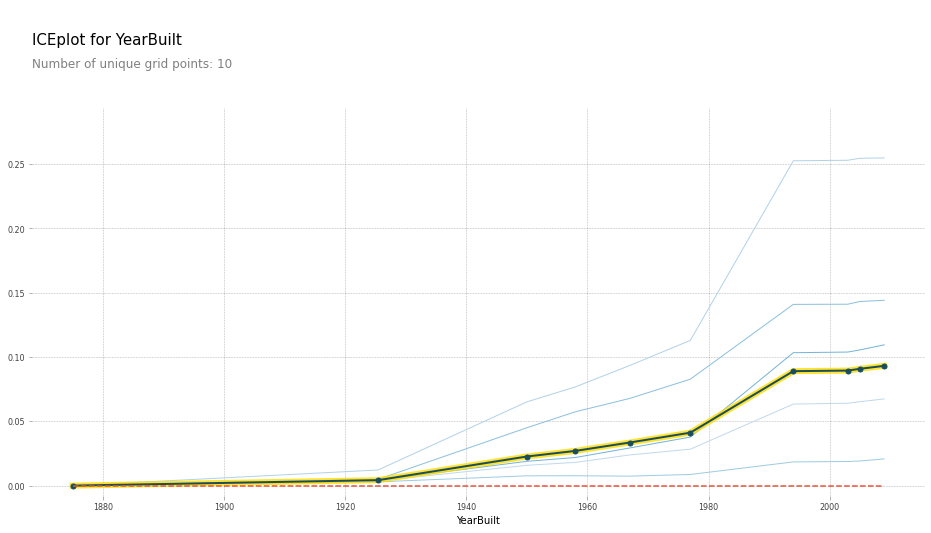

In [249]:
#5 most common.. different kind of vehicles ..different shapes


#idea prediction based on recent year should give the more weightage
plot_pdp('YearBuilt', clusters=5)

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


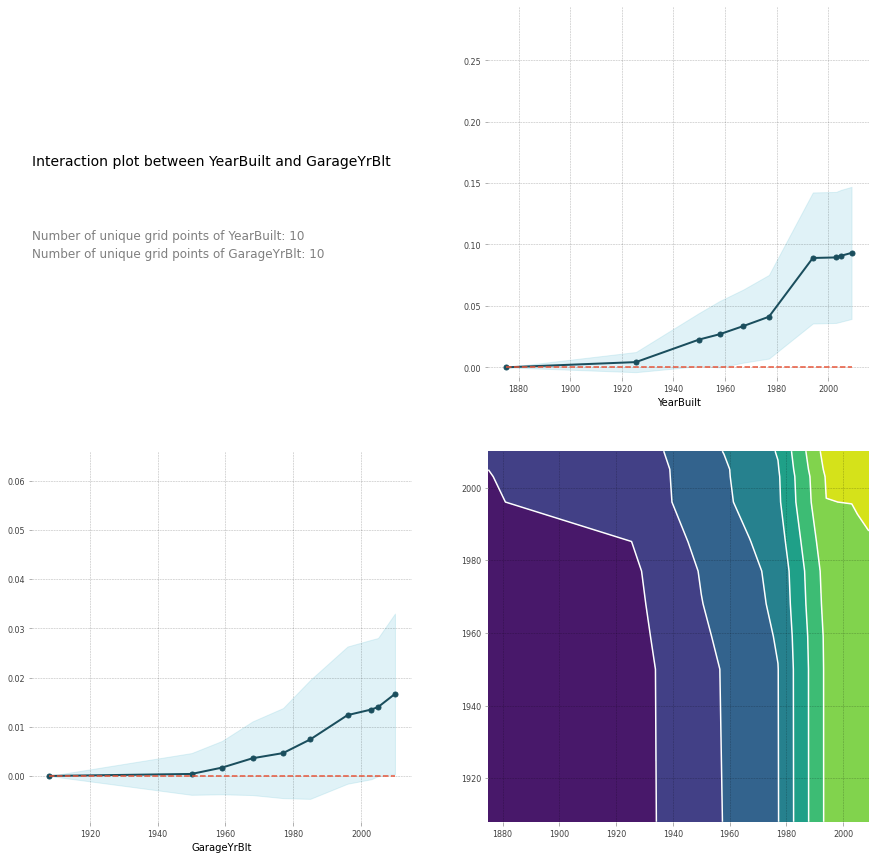

In [250]:
feats = ['YearBuilt', 'GarageYrBlt']
p = pdp.pdp_interact(m, x, feats)
pdp.pdp_interact_plot(p, feats)

## Pending Analysis (start From Here)

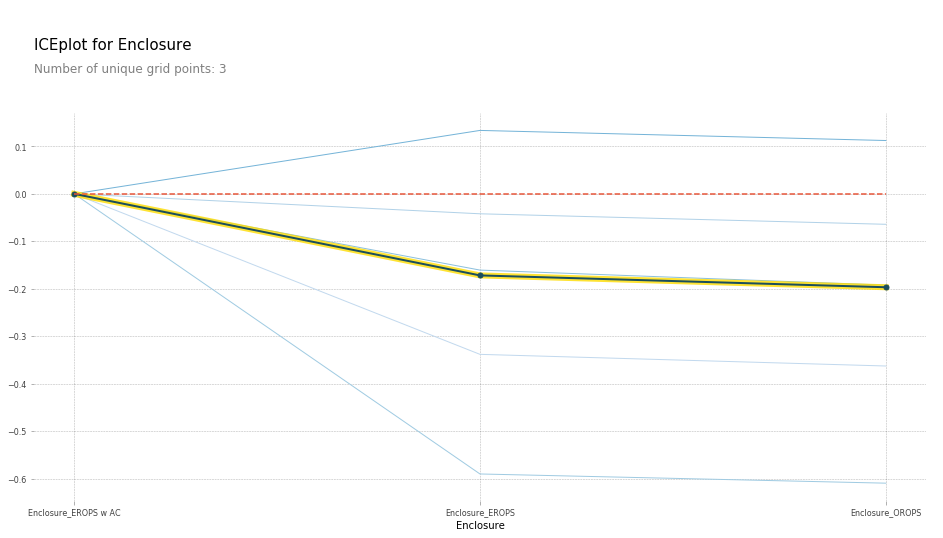

In [ ]:
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure')

In [ ]:
df_raw.YearMade[df_raw.YearMade<1950] = 1950
df_keep['age'] = df_raw['age'] = df_raw.saleYear-df_raw.YearMade

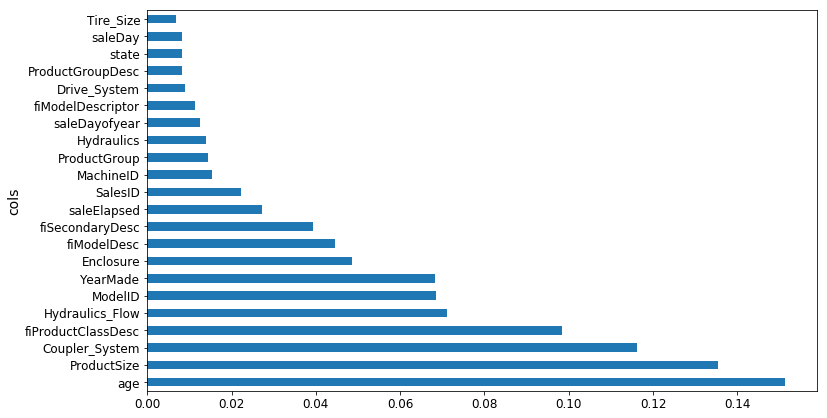

In [ ]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

# Tree interpreter

In [ ]:
from treeinterpreter import treeinterpreter as ti

In [ ]:
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

In [ ]:
row = X_valid.values[None,0]; row

array([[4364751, 2300944, 665, 172, 1.0, 1999, 3726.0, 3, 3232, 1111, 0, 63, 0, 5, 17, 35, 4, 4, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 19, 29, 3, 2, 1, 0, 0, 0, 0, 0, 2010, 9, 37,
        16, 3, 259, False, False, False, False, False, False, 7912, False, False]], dtype=object)

In [ ]:
prediction, bias, contributions = ti.predict(m, row)

In [ ]:
prediction[0], bias[0]

(9.1909688098736275, 10.10606580677884)

In [ ]:
idxs = np.argsort(contributions[0])

In [ ]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

[('ProductSize', 'Mini', -0.54680742853695008),
 ('age', 11, -0.12507089451852943),
 ('fiProductClassDesc',
  'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
  -0.11143111128570773),
 ('fiModelDesc', 'KX1212', -0.065155113754146801),
 ('fiSecondaryDesc', nan, -0.055237427792181749),
 ('Enclosure', 'EROPS', -0.050467175593900217),
 ('fiModelDescriptor', nan, -0.042354676935508852),
 ('saleElapsed', 7912, -0.019642242073500914),
 ('saleDay', 16, -0.012812993479652724),
 ('Tire_Size', nan, -0.0029687660942271598),
 ('SalesID', 4364751, -0.0010443985823001434),
 ('saleDayofyear', 259, -0.00086540581130196688),
 ('Drive_System', nan, 0.0015385818526195915),
 ('Hydraulics', 'Standard', 0.0022411701338458821),
 ('state', 'Ohio', 0.0037587658190299409),
 ('ProductGroupDesc', 'Track Excavators', 0.0067688906745931197),
 ('ProductGroup', 'TEX', 0.014654732626326661),
 ('MachineID', 2300944, 0.015578052196894499),
 ('Hydraulics_Flow', nan, 0.028973749866174004),
 ('ModelID', 665, 0.0383074

In [ ]:
contributions[0].sum()

-0.7383536391949419

# Extrapolation

In [ ]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [ ]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.99998753505765037

In [ ]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
9,SalesID,0.764744
5,saleElapsed,0.146162
11,MachineID,0.077919
8,fiModelDesc,0.002931
20,saleDayofyear,0.002569
0,YearMade,0.002358
22,age,0.001202
4,ModelID,0.000664
6,fiSecondaryDesc,0.000361
1,Coupler_System,0.000208


In [ ]:
feats=['SalesID', 'saleElapsed', 'MachineID']

In [ ]:
(X_train[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,389125.000000,389125.000000,389125.000000
mean,1800.452485,5.599522,1206.796148
std,595.627288,2.087862,430.850552
min,1139.246000,0.000000,0.000000
25%,1413.348000,4.232000,1087.016000
50%,1632.093000,6.176000,1273.859000
75%,2210.453000,7.328000,1458.661000
max,4364.741000,8.381000,2313.821000


In [ ]:
(X_valid[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,12000.000000,12000.000000,12000.000000
mean,5786.967651,8.166793,1578.049709
std,836.899608,0.289098,589.497173
min,4364.751000,6.638000,0.830000
25%,4408.580750,8.197000,1271.225250
50%,6272.538500,8.276000,1825.317000
75%,6291.792250,8.338000,1907.858000
max,6333.342000,8.382000,2486.330000


In [ ]:
x.drop(feats, axis=1, inplace=True)

In [ ]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9789018385789966

In [ ]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
19,age,0.233626
0,YearMade,0.188127
17,saleDayofyear,0.157429
4,ModelID,0.077623
7,fiModelDesc,0.061301
15,saleDay,0.056252
14,state,0.055201
3,fiProductClassDesc,0.035131
5,fiSecondaryDesc,0.023661
6,Enclosure,0.022409


In [ ]:
set_rf_samples(50000)

In [ ]:
feats=['SalesID', 'saleElapsed', 'MachineID', 'age', 'YearMade', 'saleDayofyear']

In [ ]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.21136509778791376, 0.2493668921196425, 0.90909393040946562, 0.88894821098056087, 0.89255408392415925]


In [ ]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

SalesID
[0.20918653475938534, 0.2459966629213187, 0.9053273181678706, 0.89192968797265737, 0.89245205174299469]
saleElapsed
[0.2194124612957369, 0.2546442621643524, 0.90358104739129086, 0.8841980790762114, 0.88681881032219145]
MachineID
[0.206612984511148, 0.24446409479358033, 0.90312476862123559, 0.89327205732490311, 0.89501553584754967]
age
[0.21317740718919814, 0.2471719147150774, 0.90260198977488226, 0.89089460707372525, 0.89185129799503315]
YearMade
[0.21305398932040326, 0.2534570148977216, 0.90555219348567462, 0.88527538596974953, 0.89158854973045432]
saleDayofyear
[0.21320711524847227, 0.24629839782893828, 0.90881970943169987, 0.89166441133215968, 0.89272793857941679]


In [ ]:
reset_rf_samples()

In [ ]:
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1418970082803121, 0.21779153679471935, 0.96040441863389681, 0.91529091848161925, 0.90918594039522138]


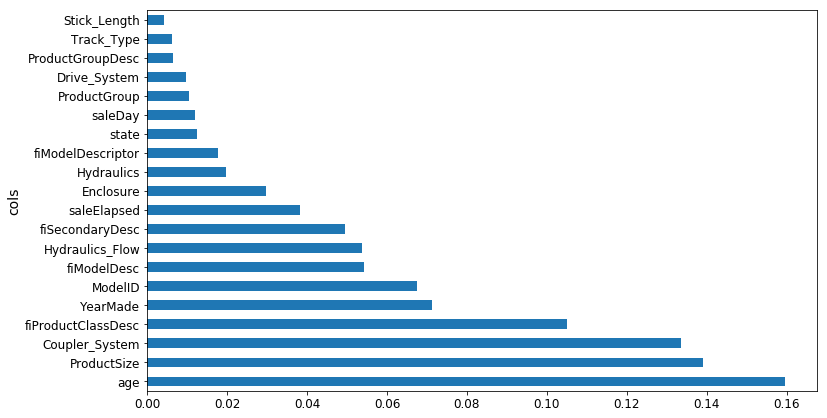

In [ ]:
plot_fi(rf_feat_importance(m, X_train));

In [ ]:
np.save('tmp/subs_cols.npy', np.array(df_subs.columns))

# Our final model!

In [ ]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 6min 3s, sys: 2.75 s, total: 6min 6s
Wall time: 16.7 s
[0.08104912951128229, 0.2109679613161783, 0.9865755186304942, 0.92051576728916762, 0.9143700001430598]
